In [1]:
!pwd

/c/Users/ETHICSENSE/Desktop/aiffel/dataton/poc_lab/VoC_RM


In [2]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

print(tf.__version__)

2.6.0


In [3]:
data_dktc_path = os.path.join("./datasets/dktc/data", "train.csv")

df = pd.read_csv(data_dktc_path)

In [4]:
df['conversation']

0       지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1       길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2       너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3       어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4       저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
                              ...                        
3945    준하야 넌 대가리가 왜이렇게 크냐?\n내 머리가 뭐.\n밥먹으면 대가리만 크냐 너는...
3946    내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내\n예.?...
3947    나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지.\n왜 그래. 들리겠어...
3948    누구맘대로 여기서 장사하래?\n이게 무슨일입니까?\n남의 구역에서 장사하려면 자릿세...
3949    희정씨\n네?\n주말에 시간이 넘쳐나나봐\n갑자기 왜그러세요?\n손이 빤짝빤짝 네일...
Name: conversation, Length: 3950, dtype: object

In [5]:
len(df['conversation'][0])

242

In [6]:
df['conversation'][0]

'지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.'

문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 226


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


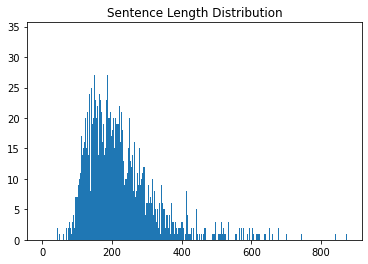

In [72]:
min_len = 99999
max_len = 0
sum_len = 0

for sen in df['conversation']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(df['conversation']))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in df['conversation']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [8]:
def check_sentence_with_length(df, length):
    count = 0
    
    for sen in df:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

In [9]:
check_sentence_with_length(df['conversation'], 41)

일다했나
아니오
빨리해
네
언제할꺼야
내일까지
오늘끝내
안돼요
밤새서해
네
안녕
네?
무시해?
아뇨
이쁘네
네?
이쁘다구
아 네
오늘 시간되니?
아뇨


In [11]:
tmp = []

for sen in df['conversation']:
    tmp.append(len(sen))

set(tmp)

{41,
 45,
 50,
 57,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 71,
 72,
 74,
 75,
 76,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,


In [12]:
check_sentence_with_length(df['conversation'], 513)

아저씨! 여기 국에 칼날 들어간거 보이지? 내가 이거 먹고 큰일나면 어쩔 뻔했어?
혹시 꾸미신 일 아닙니까? 저희 가게는 세라믹 칼 써서 이 은색칼날이 들어갈리 없는데요.
내가 나 다치게 하려고 이런 일 꾸미겠나? 사과도 못 할망정 꾸민 일 이라고?
그게 아니고 합리적인 의심을 하는거죠. 저희 가게는 쇠로 된 칼 안 쓰니까. 돌려볼까요?
아니. 그. 그래 보던가! 그대신 칼 들어가 있던거면 각오하는 게 좋을거야.
여기 보이시죠. 은색 반짝 거리는거 손님이 국에 넣으신거잖아요. 사기치셨네요 맞죠?
한 번만 용서해주시게. 내가 국밥 낼 돈도 없어서 이런 짓을 했어. 그냥 조용히 나갈테니 한 번만 넘어가 주시게.
에이 그렇게는 안되죠. 제가 경찰에 신고 안 할테니까 아저씨 손가락에 있는 금반지 주세요.
이거.? 이거 결혼반지라 잃어버리면 안되는데.
그럼 지금 경찰에 신고할게요. 아내분께서 아시면 얼마나 어이 없어하실지 동네 창피하시겠네요.
아 내가. 내가. 이 결혼반지 두고 나갈게. 신고 하지 말아줘 부탁이네.


In [14]:
data_koen_path = os.path.join("./datasets/ko-en_translation", "train.csv")

df1 = pd.read_csv(data_koen_path)

In [22]:
tmp = df1[df1['class']=='일반']

tmp.head()

,idx,label,class,conversation
3950,3950,0,일반,이번 신제품 출시에 대한 시장의 반응은 어떤가요?\n판매량이 지난번 제품보다 빠르게...
3951,3951,0,일반,지난 회의 마지막에 논의했던 안건을 다시 볼까요?\n그보다는 이번 주 새로운 주제가...
3952,3952,0,일반,"이번 주 금요일까지 2천개를 더 주문하라는 건가요?\n네, 시간이 조금 촉박하기는 ..."
3953,3953,0,일반,사무용품이나 가구 중 가장 먼저 바꿔야 할 것은 뭐라고 생각하나요?\n아무래도 컴퓨...
3954,3954,0,일반,오늘이나 내일 중에 본사에 가시는 분이 있나요?\n제가 오늘 오후 5시쯤 본사에 가...


In [23]:
len(tmp)

3949

In [24]:
len(df1)

7899

문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 177


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


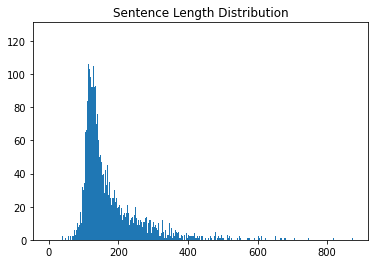

In [73]:
min_len = 99999
max_len = 0
sum_len = 0

for sen in df1['conversation']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(df1['conversation']))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in df1['conversation']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

문장의 최단 길이: 66
문장의 최장 길이: 236
문장의 평균 길이: 128


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


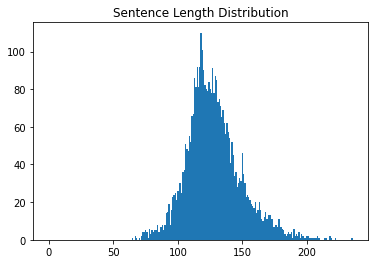

In [26]:
min_len = 99999
max_len = 0
sum_len = 0

for sen in tmp['conversation']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(df))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in tmp['conversation']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [74]:
def show_length(df1, df2, df3):
    for data in df1, df2, df3:
        min_len = 99999
        max_len = 0
        sum_len = 0
        for sen in data:
            length = len(sen)
            if min_len > length: min_len = length
            if max_len < length: max_len = length
            sum_len += length

        print("문장의 최단 길이:", min_len)
        print("문장의 최장 길이:", max_len)
        print("문장의 평균 길이:", sum_len // len(data))

        sentence_length = np.zeros((874), dtype=np.int)

        for sen in data:
            sentence_length[len(sen)-1] += 1

        plt.bar(range(874), sentence_length, width=1.0)
        plt.title("Sentence Length Distribution")
        plt.show()

문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 226


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


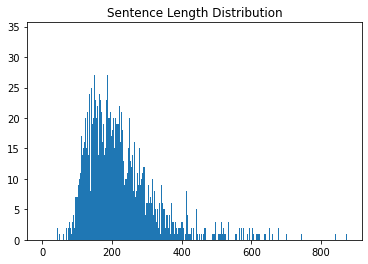

문장의 최단 길이: 41
문장의 최장 길이: 874
문장의 평균 길이: 177


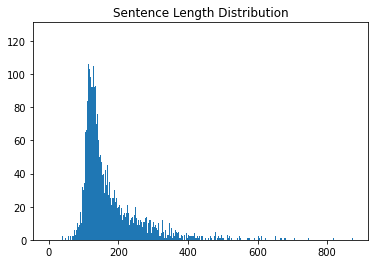

문장의 최단 길이: 66
문장의 최장 길이: 236
문장의 평균 길이: 128


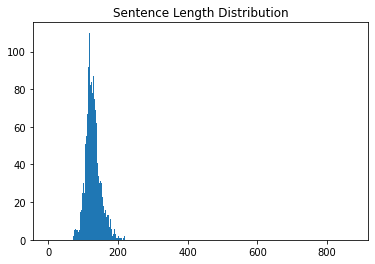

In [75]:
show_length(df['conversation'], df1['conversation'], tmp['conversation'])

In [57]:
data_origin_path = os.path.join("./datasets/ko-en_translation", "origin.csv")

df2 = pd.read_csv(data_origin_path)

In [58]:
df2

,대분류,소분류,상황,Set Nr.,발화자,원문,Unnamed: 6,번역문
0,비즈니스,회의,의견 교환하기,1,A-1,이번 신제품 출시에 대한 시장의 반응은 어떤가요?,이번 신제품 출시에 대한 시장의 반응은 어떤가요?\n판매량이 지난번 제품보다 빠르게...,How is the market's reaction to the newly rele...
1,비즈니스,회의,의견 교환하기,1,B-1,판매량이 지난번 제품보다 빠르게 늘고 있습니다.,NaN,The sales increase is faster than the previous...
2,비즈니스,회의,의견 교환하기,1,A-2,그렇다면 공장에 연락해서 주문량을 더 늘려야겠네요.,NaN,"Then, we'll have to call the manufacturer and ..."
3,비즈니스,회의,의견 교환하기,1,B-2,"네, 제가 연락해서 주문량을 2배로 늘리겠습니다.",NaN,"Sure, I'll make a call and double the volume o..."
4,비즈니스,회의,의견 교환하기,2,A-1,지난 회의 마지막에 논의했던 안건을 다시 볼까요?,지난 회의 마지막에 논의했던 안건을 다시 볼까요?\n그보다는 이번 주 새로운 주제가...,Shall we take a look at the issues we discusse...
...,...,...,...,...,...,...,...,...
99995,여행/쇼핑,쇼핑,"계산/포장/배달 (계산 장소 문의, 계산 오류 등)",24999,B-2,"저희가 가격표 배치를 잘못해서 혼동을 드렸나 봐요, 죄송해요.",NaN,It seems that we didn't place the price tags c...
99996,여행/쇼핑,쇼핑,"계산/포장/배달 (계산 장소 문의, 계산 오류 등)",25000,A-1,"백화점 포인트로 계산하고 싶은데, 가능한가요?","백화점 포인트로 계산하고 싶은데, 가능한가요?\n네, 물론이죠, 전화번호 입력해주시...",Can I pay using the department store points?
99997,여행/쇼핑,쇼핑,"계산/포장/배달 (계산 장소 문의, 계산 오류 등)",25000,B-1,"네, 물론이죠, 전화번호 입력해주시면 됩니다.",NaN,"Yes, of course, you just need to enter your ph..."
99998,여행/쇼핑,쇼핑,"계산/포장/배달 (계산 장소 문의, 계산 오류 등)",25000,A-2,"입력했어요, 전액 백화점 포인트로 결제하고 싶어요.",NaN,"I entered it, I want to pay it with all the de..."


In [65]:
df2.drop(columns=['대분류', '소분류', '상황', '발화자', '원문', '번역문'], inplace=True)

In [67]:
df2.dropna(inplace=True)

In [68]:
df2

,Set Nr.,Unnamed: 6
0,1,이번 신제품 출시에 대한 시장의 반응은 어떤가요?\n판매량이 지난번 제품보다 빠르게...
4,2,지난 회의 마지막에 논의했던 안건을 다시 볼까요?\n그보다는 이번 주 새로운 주제가...
8,3,"이번 주 금요일까지 2천개를 더 주문하라는 건가요?\n네, 시간이 조금 촉박하기는 ..."
12,4,사무용품이나 가구 중 가장 먼저 바꿔야 할 것은 뭐라고 생각하나요?\n아무래도 컴퓨...
16,5,오늘이나 내일 중에 본사에 가시는 분이 있나요?\n제가 오늘 오후 5시쯤 본사에 가...
...,...,...
99980,24996,"여기 있는 포도는 한 바구니에 얼마나 하나요?\n포도는 한 바구니 5,000원, 두..."
99984,24997,"이건 이미 결제했는데, 왜 영수증에 또 포함된 건가요?\n잠시만요, 여기 화장품 가..."
99988,24998,"멜론을 한 통 샀는데, 두 통이라고 찍혀 있어요.\n저희 직원이 계산 실수를 한 것..."
99992,24999,"저는 9,000원으로 보고 샀는데, 영수증 보니 14,000원이 찍혀있네요.\n네,..."


In [69]:
df2.rename(columns={'Unnamed: 6':'conversation'}, inplace=True)

In [70]:
df2

,Set Nr.,conversation
0,1,이번 신제품 출시에 대한 시장의 반응은 어떤가요?\n판매량이 지난번 제품보다 빠르게...
4,2,지난 회의 마지막에 논의했던 안건을 다시 볼까요?\n그보다는 이번 주 새로운 주제가...
8,3,"이번 주 금요일까지 2천개를 더 주문하라는 건가요?\n네, 시간이 조금 촉박하기는 ..."
12,4,사무용품이나 가구 중 가장 먼저 바꿔야 할 것은 뭐라고 생각하나요?\n아무래도 컴퓨...
16,5,오늘이나 내일 중에 본사에 가시는 분이 있나요?\n제가 오늘 오후 5시쯤 본사에 가...
...,...,...
99980,24996,"여기 있는 포도는 한 바구니에 얼마나 하나요?\n포도는 한 바구니 5,000원, 두..."
99984,24997,"이건 이미 결제했는데, 왜 영수증에 또 포함된 건가요?\n잠시만요, 여기 화장품 가..."
99988,24998,"멜론을 한 통 샀는데, 두 통이라고 찍혀 있어요.\n저희 직원이 계산 실수를 한 것..."
99992,24999,"저는 9,000원으로 보고 샀는데, 영수증 보니 14,000원이 찍혀있네요.\n네,..."


문장의 최단 길이: 54
문장의 최장 길이: 352
문장의 평균 길이: 128


C:\Users\ETHICSENSE\anaconda3\envs\vocproject\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


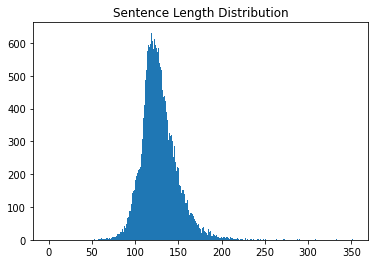

In [78]:
min_len = 99999
max_len = 0
sum_len = 0

for sen in df2['conversation']:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(df2['conversation']))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in df2['conversation']:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [104]:
count = 0

for data in df2['conversation']:
    if 150<len(data)<250:
        count += 1
        
print(count)

3206


In [103]:
len(df)

3950

In [164]:
new_df2 = pd.DataFrame(columns=['label','class','conversation'])

count = 0

for data in df2['conversation']:
    
    if 150<=len(data)<=250:
        
        print(data)
        print()
        count += 1
        tmp = pd.DataFrame(columns=range(3))
        tmp.loc[0] = [0, '일반', data]
        new_df2.append(tmp)

print(count)
new_df2

하 팀장님, 안녕하세요. 해외사업팀 김소미 대리입니다.\n김대리님 안녕하세요. 중국 출장 관련 전체 예산안이 바뀌어서 기안서 변경이 필요할 듯 싶네요.\n네, 안 그래도 기안서 변경건 관련해서 이야기 듣고 연락드립니다.\n제가 김대리님 이메일로 변경 사항 안내 드리도록 하겠습니다.

안녕하세요. 제가 이번 출장에 중국어 통역을 맡게 된 해외 사업팀 김소미 대리입니다.\n안녕하세요. 저희 팀이 이번 중국 진출을 위해 프레젠테이션을 하게 되었는데, 잘 부탁드립니다.\n저도 잘 부탁 드리고 미흡하지만 최선을 다해서 통역해드리도록 하겠습니다.\n이번 발표 관련 사항들 이메일로 안내 드리겠습니다.

지난 주에 말씀 드렸던 중국 출장 비자 발급 건에 대해 여쭤봅니다. 발급 완료 되었나요?\n아, 어제 중국 대사관 측에서 연락이 왔는데 한가지 문제점이 있습니다.\n다음주가 출장이라 급하게 발급 받아야 하는데, 혹시 어떤 문제가 발생했을까요?\n저희가 언론사라서 그런지 특별 비자 발급 신청을 해야할 것 같습니다.

부산 출장이 2주후로 다가왔습니다. 다들 준비는 착오없이 진행되고 있나요?\n팀장님, 방금 부산 사무국 측에서 연락이 왔는데 폭우로 인해 스케줄이 전면 변경된다고 합니다.\n아, 그거 참 큰일이군요. 저희 KTX 타고 가기로 했는데, 혹시 일정 변경 가능한가요?\n제가 변경 페널티가 없는지 확인해보고 다시 보고 드리겠습니다.

김대리님, 다음 주에 호주로 출장 가는데 혹시 현지 코디 섭외 완료 되었나요?\n현재 섭외 중에 있는데, 한국말과 호주식 영어를 둘 다 완벽하게 구성하는 분을 찾기가 어렵네요.\n그렇군요. 저희가 섭외되는 대로 빨리 연락을 취해야 하는 상황이라서요.\n네. 제가 최대한 빨리 섭외해서 안내 드리도록 하겠습니다.

회사에서 지원해주는 해외 출장 일일 경비가 어떻게 책정 되어있는지 혹시 아시나요?\n아, 그것에 관련해서는 아마 재무팀이나 인사팀 쪽에서 더 잘 알고 계실거에요.\n감사합니다. 제가 관련팀에 연락 취해서 기안서 작성 마무리 하도록 하

나 우리 이번 그룹 과제 팀 너무 좋은 것 같아. 우리 다음 그룹 과제 때에도 같이 하자. 어때?\n맞아. 나도 지금까지 해왔던 팀 중에 이번 팀이 가장 잘 맞는 것 같아.\n이렇게 잘 맞는 사람들끼리 같은 팀 되기도 쉽지 않은데 점수도 잘 나왔어.\n그래. 우리 이 팀 계속 유지해서 이번 학기 꼭 A 받자.

혹시 상철 선배 어디 있는지 아시는 분?\n그 선배는 지금 또 어디서 술 마시고 있을 거다. 그룹 과제 할 때 피해야 할 대상 1순위잖아.\n진짜 우리 팀 절대 못 들어오게 했었어야 했는데... 하... 전화해볼게.\n진짜 우리 팀 조장이 고생이 많다. 상철 선배를 어떻게 데리고 오려나.

이번 그룹 과제 범위 진짜 넓었는데 그래도 조금씩 분배하니까 금세 끝난 것 같아. 다들 수고 많았어.\n조장이 수고 제일 많았지. 다들 우리를 위해 수고해 준 조장을 위해 박수!\n쑥스럽게 왜 이래. 나도 우리 팀원들이 열심히 한 번도 안 빠지고 잘해준 덕분에 조장 역할 잘 할 수 있었던 것 같아.\n다음번에도 우리 조장이 되어줘. 그때도 우리가 잘 따르고 열심히 할게.

이번 그룹 과제는 진짜 현직 회사 임원들 앞에서 발표하는 거야.\n진짜? 그러면 우리 모두 다 좀 전문가답게 보이려면 정장 차림이어야겠지?\n근데 우리 발표 주제와 개념이 조금 정장과는 동 떨어져 있긴 해서... 다들 생각이 어때?\n나는 세미 정장이나 비지니스 캐주얼 정도만 입어도 너무 예의 없어 보이진 않을 것 같아.

이번 그룹 과제에 새롭게 추가된 규정이 있는데, 내가 조장으로서 매일 팀원들 출석 여부를 체크를 해서 교수님께 보고해야 돼.\n진짜? 그럼 매번 그룹 과제 회의 때 따로 출석을 체크한다는 거지?\n응. 이번 학기에는 참여 인원수 파악하고 단체 사진 하나 찍어서 교수님께 보내드려야 한대.\n아마 지난 학기 그룹 과제에 너무 한 사람이 과제를 다 하는 상황이 오니까 새롭게 방법을 만드셨나 보다.

이번 그룹 과제는 다들 알겠지만, 자체적으로 가장 열심히 한 사람을 1명 뽑아서 교수님

예지야. 오늘 왜 이렇게 화가 났어? 무슨 일 있었어?\n아니, 오늘 입을 옷을 미리 어젯밤에 챙겨놨는데 우리 언니가 입고 갔어. 그래서 입을 옷을 찾는 데 시간이 걸려서 버스를 놓쳤어.\n진짜 화났겠다. 우리 언니도 항상 내가 옷을 미리 챙겨놨을 때 그래.\n어쩔 땐 그냥 한 대 때려주고 싶다니깐. 제발 안 그랬으면 좋겠어.

예지야, 오늘 왜 이렇게 머리끝까지 화가 났어? 무슨 일이야.\n내가 과제 해놓은 걸 식탁 위에 뒀는데 동생이 거기에 크레파스로 낙서를 해놨어.\n정말? 그래서 어떻게 했어? 과제 제출했어?\n다행히 제출했지. 근데 과제 제출하려고 다시 과제 출력하다가 버스를 놓쳐서 지각했어.

오늘 무슨 일 있었어? 지각을 안 하던 애가 갑자기 지각해서 놀랐어.\n사실 오늘 비가 많이 왔잖아. 그래서 학교 가는 길에 차 사고 나서 길이 많이 막혔어.\n어휴, 비가 너무 많이 오긴 해. 그래도 너 안 다치고 학교 와서 다행이다.\n그래. 집에 가는 길에 조심히 운전해서 가야겠어.

하나야, 오늘 무슨 일 있어? 한숨만 계속 쉬네.\n그게 말이야. 두리야, 오늘 동생이 아파서 돌봐줬어. 나 학교 가야 해서 사촌 언니에게 동생 간호해달라고 부탁했는데 잘하고 있는지 걱정이 되네.\n그래? 난 너 오늘 지각해서 심란한 줄 알았어. 동생은 괜찮을 거야.\n사촌 언니가 일이 있어서 늦게 병실에 도착했거든. 어쩔 수가 없었어.

재석아, 오늘 지각했네. 지각도 안 하던 애가 지각을 하다니 무슨 일 있어?\n그게 버스를 타려는데 지갑을 집에 놓고 왔어. 그래서 다시 집으로 가서 지갑 들고 왔지.\n정말 싫었겠다. 나도 저번에 그랬다가 지각을 했잖아.\n다음에는 지갑을 잘 챙겨야겠어. 미리 확인해야지.

도서부에서는 별로 크게 할 일은 없어. 동아리 활동 시간에 원하는 책을 읽으면 돼.\n그 외에는 일이 없나요? 도서 출납업무를 한다고 들었어요.\n그거는 도서부원들끼리 당번을 정해서 하는 거야. 점심시간이랑 방과 후에 하면 돼.\n그렇군요. 오늘 당번 정하겠네요. 열

문의드릴 게 있어서 연락드립니다. 내일 회의 시간을 조정할 수 있을까요?\n물론입니다. 시간 조정하시는 이유 여쭤봐도 괜찮을까요?\n해외 손님이 내일 갑작스럽게 방문하시게 되어서 시간이 안 될 것 같아요.\n알겠습니다. 가능한 시간 알려주시면 조정 후 연락드리겠습니다.

이번 회의에서 가장 중요한 협상 포인트는 무엇이죠?\n단연 가격 협상입니다. 가격이 확정되어야 다른 요소들을 정할 수 있다고 생각합니다.\n동의합니다. 다음 주 금요일에 가격에 대해서 회의하는 거 어떠세요?\n좋습니다. 회의 시간과 내용은 저희 팀원들에게 따로 전달할게요.

내일 회의 준비 많이 했니? 다른 팀과의 회의는 처음이라 많이 긴장돼.\n긴장하지 마. 잘할 수 있을 거야. 원래 하던 방식으로 하면 돼.\n고마워. 혹시 예전에 했던 회의를 정리했던 자료를 가지고 있니?\n물론이지. 이메일 주소 남기면 그 자료들 찾아서 내가 바로 보내줄게.

안녕하세요. 광고 회사입니다. 광고 콘셉트에 관해서 회의가 필요합니다.\n네. 안녕하세요. 혹시 신발에 관한 광고 말씀하시는 건가요?\n네. 맞습니다. 이번에 저희 광고 회사 측으로 광고 요청이 들어왔습니다.\n잠시만요. 사장님께 여쭤보고 다시 연락 드리도록 하겠습니다.

회의 가능 시간을 조율하는 것은 정말 어려운 것 같아.\n왜 그렇게 생각하니? 혹시 무슨 일 있었던 거니?\n이번 공급팀과 회의 날짜를 정하는데 일주일이 넘게 걸렸어. 너무 힘들었어.\n정말? 듣기만 해도 힘들다. 사람이 많으면 회의 시간을 조율하는 것이 정말 어렵구나.

제가 회의를 신청하려고 이메일을 보냈는데 답장이 없으셔서 전화드렸습니다.\n제가 개인 이메일은 자주 읽지 않습니다. 무슨 일이시죠?\n이번에 개최하시는 행사와 관련하여 관심이 있어서 회의를 잡고 싶습니다.\n그렇다면 회사 이메일을 알려드릴 테니 그쪽으로 다시 연락해주세요.

우리 아이가 어제부터 기침을 너무 심하게 해요. 열도 약간 높아요.\n그렇군요. 청진을 한번 해 볼까요? 여기 앉아서 숨을 크게 들이마셨다가

호텔 내부에 있는 온천을 이용하고 싶습니다. 이용 방법에 관해 설명 좀 부탁드려요.\n1층 로비에 있는 카운터에서 이용권을 먼저 구매하셔서 지하 1층 온천으로 가시면 됩니다.\n감사합니다. 혹시 온천 운영 시간이 어떻게 되나요?\n오전 7시부터 오후 11시까지 운영됩니다. 자세한 사항은 온천 내의 직원에게 문의해 주세요.

호텔 내에 이용 가능 한 컴퓨터가 있나요? 급히 컴퓨터를 사용할 일이 있어서요.\n네. 5층에 가시면 컴퓨터실이 있습니다. 오후 10시까지만 운영되는 점 참고해 주세요.\n감사합니다. 혹시 프린터도 있나요?\n네. A4용지와 함께 프린터도 사용 가능합니다. 컴퓨터 사용요금은 1시간에 2,000원입니다.

체크인 완료되었습니다. 혹시 호텔 이용에 궁금한 점 있으신가요?\n네. 호텔 내의 피트니스를 이용하고 싶은데 어떻게 이용하나요?\n피트니스 이용권을 여기서 구매하시면 됩니다. 1일 이용권은 10,000원, 3일 이용권은 20,000원입니다.\n감사합니다. 3일 이용권으로 구매할게요. 여기 20,000원 현금으로 드리겠습니다.

좋은 아침입니다. 다른 게 아니라 오늘 제가 나간 사이 방 청소 좀 부탁할게요.\n네. 지금 묵고 계신 객실 번호가 어떻게 되시죠? 성함도 말씀해 주세요.\n저는 1804호에 묵고 있습니다. 이름은 장발장입니다.\n네. 청소 바로 도와드리겠습니다. 오늘도 좋은 여행 하세요.

방금 저희 방에 쥐가 나왔어요. 바닥을 막 돌아다니다가 또 사라졌어요.\n너무 놀라셨죠? 죄송합니다. 바로 객실을 바꿔드리겠습니다.\n감사합니다. 아직 놀란 마음이 진정이 안 돼요… 어떻게 쥐가 나올 수 있죠?\n앞으로 청결에 더욱 신경 쓰겠습니다. 다시 한번 죄송합니다. 객실은 디럭스 룸으로 업그레이드해서 드리겠습니다.

방음이 잘 안 되는지 옆 방의 소리가 너무 크게 들려서 시끄러워요.\n죄송합니다. 옆 방에 아이들이 있어서 큰 소리가 많이 나는 것 같습니다.\n네. 방 좀 바꿔주세요. 시끄러워서 도저히 잠을 잘 수가 없습니다.\n알겠습니다.

정말 가격을 믿을 수가 없어. 시중 판매 가격보다 10%가 저렴해.\n그것이 바로 면세점의 매력이지. 나는 화장품은 주로 다 면세점에서 구매해.\n너 공항버스 앞에 있는 면세점 할인 쿠폰을 사용하면 더 싸게 구매할 수 있다는 사실을 아니?\n맞아. 그래서 내가 이번에 그 쿠폰을 사용해서 화장품을 사볼까 해.

사장님, 무슨 물건을 구매하시려고 면세점에 가시나요?\n제 딸이 제게 사달라고 부탁한 물건이 있습니다. 나스 블러셔를 사달라고 했습니다.\n그렇다면 제가 한꺼번에 사서 출국장 앞으로 가겠습니다. 저도 살 화장품이 있습니다.\n그럼 부탁해도 될까요? 제가 화장품에 대해서는 잘 몰라서요. 대신 커피 대접할게요.

이번 주에 미국 출국 전에 공항에서 조금 일찍 만나도 될까요?\n왜요? 뭐 구매하실 물건이라도 있나요? 아니면 확인할 것이 있나요?\n마사지기에 대한 면세점 할인 혜택이 있다길래 구매하려고 합니다.\n면세점 할인 혜택이라면 인터넷에도 있을 텐데, 인터넷 면세점을 이용해보는 것은 어떠세요?

이번에 정말 많은 물건을 구매했구나. 뭐를 그렇게 많이 샀니?\n다 사용한 화장품이랑 가서 쓸 선글라스를 구매했어. 마침 선글라스 할인을 진행하고 있었어.\n그거 정말 좋은 소식이구나. 나도 선글라스 하나 살까 고민했는데, 같이 보러 갈래?\n그래. 내가 위치를 아니까 같이 가자. 너도 이번 기회에 사면 좋을 것 같아.

너 이렇게 많은 면세품을 구매하면 어떡해. 필리핀은 아마 벌금이 있을 거야.\n내가 산 것은 가방이랑 선글라스뿐인데? 이것도 벌금을 내야 할까?\n내가 세부로 놀러 갔을 때, 명품을 구매했다고 50달러 벌금을 내라고 했어.\n정말 말도 안 된다. 그럼 이 물건들을 어떡해야 할까? 너랑 나랑 나눠서 들고 갈까?

안녕하세요. 손님. 무엇을 찾으시나요? 보고 오신 상품이 있나요?\n싱가포르 현지 친구에게 한국 고유의 분위기가 있는 선물을 주고 싶어요.\n그럼 홍삼 선물 세트는 어떠세요? 요즘 제일 잘 나가는 상품입니다.\n어린 친구라서 이런 것보다는

지난번에 맛봤던 메뉴는 아직 나오지 않은 건가요? 그거 너무 맛있었어요.\n아직 재료에 관해서 가격 협의 중입니다. 재료 공급이 관건인 음식이라서요.\n그렇군요. 잘 해결돼서 꼭 나왔으면 좋겠어요. 많은 사람이 맛봤으면 합니다.\n그렇게 말씀해주시니 너무 힘이 되네요. 저도 꼭 많은 사람에게 선보이고 싶어요.

오늘 코스 요리 중에 디저트가 제일 맛있었던 것 같아. 또 먹고 싶다.\n맞아. 빵이랑 초콜릿이 입에서 살살 녹았어. 그것만 따로 주문 가능한지 물어볼까?\n응. 한번 물어봐 줄래? 만약 가능하면, 엄마 아빠도 하나씩 사다 드리고 싶어.\n응. 잠시만 기다려봐. 식당 매니저에게 물어보고 올게.

지난번보다 음식량이 적어진 것 같아. 그냥 내 느낌인가?\n아냐. 나도 그렇게 느꼈어. 뭔가 그릇도 작아지고 음식량도 적어진 것 같아.\n여기 적혀있다. 재룟값이 올라서 메뉴값을 동일하게 하는 대신 양을 줄였대.\n그렇구나. 우리 아무래도 메뉴 하나를 더 시켜야 할 것 같아. 이걸로는 부족해.

너무 맛있다. 딱히 많은 양념이 들어간 것 같지 않은데 맛있는 것 같아.\n그만큼 재료가 신선하다는 의미지. 재료가 신선하면 음식 맛이 더 맛있어지는 것 같아.\n신선한 재료 공급을 위해 사장님이 매일 새벽에 수산시장에 나가신다고 들었어.\n역시. 그런 노력이 있어서 이런 엄청난 성과를 이룰 수 있었다고 생각해.

저기요. 저희가 메뉴를 총 3개를 시켰는데 아직 하나가 나오지 않았습니다.\n죄송합니다. 잠시 확인하고 오겠습니다. 조금만 양해 부탁드립니다.\n주문이 안 들어간 건가요? 만약 그렇다면 그냥 취소 부탁드립니다.\n정말 죄송합니다. 아무래도 직원분이 실수하신 것 같아요. 취소하겠습니다.

정말 오랜만에 방문해주셨습니다. 음식 맛은 어떠셨나요?\n역시 여기 음식은 항상 맛있는 것 같아요. 양념이 약간 바뀐 것 같던데 맞나요?\n네. 맞아요. 역시 미식가 입맛이라서 그런지 차이를 단번에 알아차리시네요.\n여기 음식을 좋아하기 때문이죠. 바뀐 양념이 더 좋은 것 같아

시청으로 가는 길이었는데 길이 헷갈려요. 이 길이 아닌 것 같기도 하고.\n여긴 시청가는 길이 아니에요. 중간에 길을 잘못 드신 것 같네요.\n어디로 가야 하나요? 지도가 없어서 길을 알 방법이 없네요.\n여기서 왔던 길로 되돌아가다가 큰 사거리가 나오면 오른쪽 길로 가세요.

엄마를 못 찾겠어요. 조금 전까진 엄마, 아빠랑 함께 있었는데 한눈판 사이 없어졌어요.\n그럼 일단 저와 함께 미아보호소에 가서 엄마를 기다릴까요?\n네. 혹시 그사이에 엄마, 아빠가 저를 애타게 찾으면 어떡하죠?\n미아보호소에서 방송으로 엄마, 아빠를 부르면 잘 찾아오실 거예요.

이 길이 한국민속촌에 가는 길이 아닌가요? 지도 보고 왔는데 안 보여서요.\n이 길이 맞아요. 근데 조금 더 들어가야 해요. 한 15분 정도 더 걸어야 할 거예요.\n그렇군요. 감사합니다. 오늘 한국민속촌 열었나요?\n네. 이미 많은 관광객이 방문하고 있답니다. 어서 가보세요.

불고기 맛집을 찾아가고 있는데요. 이 길이 맞는지 모르겠어요.\n죄송하지만 저도 그곳은 가본 적이 없어서 잘 모르겠네요. 혹시 식당 이름이 무엇인가요?\nOO 불고기예요. 들어본 적 없으신가요?\n네. 하지만 지도 앱을 이용해서 찾아갈 수 있을 거 같아요. 제가 한 번 검색 해 볼게요.

여기가 공원 가는 길 맞나요? 길도 좁고 으스스한 게 잘못 든 거 같아요.\n공원 가는 길이 맞긴 한데 좁은 길로 돌아서 가고 있네요. 큰길로 가면 더 빨리 갈 수 있어요.\n큰길로 가려면 어디로 빠져야 하죠?\n일단 가던 길로 쭉 가다가 큰 편의점이 하나 나오면 거기서 좌회전해서 가면 큰길로 갈 수 있어요.

숙소를 찾아가는 길인데요. 번지수가 너무 헷갈려서요. 72번지 건물이 어디에 있나요?\n여기가 68번이고 저기가 67번이니까 이쪽 방향으로 4개 건물만 지나면 72번 건물일 거예요.\n감사합니다. 혹시 건물 번호가 쓰여 있나요?\n네. 모든 건물이 현관 옆에 번호를 달아놓았어요. 확인하면서 찾아보세요.

장미꽃 전시회가 여기서 열린다고 들었

시험 기간이라서 그런지 도서관에 사람이 엄청 많네.\n맞아, 미리 도서관에 와서 자리를 맡아놓는 사람 때문에 앉기가 힘드네.\n이제부터 1시간 이상 자리에 없으면 강제로 그 자리를 정리한다고 들었어.\n차라리 시간을 정해서 자리를 이용할 수 있도록 예약하는 방법이 있으면 좋겠다.

신입생들에게 우리 동아리에 가입하도록 안내하려고 하는 데 다 같이 참여했으면 좋겠어.\n온종일 있는 건 어려운데 서로 교대로 돌아가면서 하는 건 어때요?\n나도 그렇게 생각해, 그래서 3시간 동안 3명씩 하려고 하는데 어떻게 생각해?\n3명은 부족한 것 같고 4명이 좋을 것 같아요.

이번에 프로젝트에서 디자인을 맡게 되었습니다, 잘 부탁합니다.\n저는 설계를 담당하게 되었는데 성공적인 프로젝트를 이뤘으면 좋겠어요.\n여러 의견을 주고받게 될 거 같은데 큰 문제 없이 원만하게 해결되었으면 좋겠네요.\n서로 잘 조율하면 좋은 결과를 얻을 수 있을 거라 생각됩니다.

각자 일 때문에 바빠서 오늘 네 생일인데도 못 봐서 아쉽다.\n나도 그래, 그런데 방금 내 이름으로 택배가 왔던데 네가 보낸 거야?\n응, 정성이 담긴 선물을 하고 싶어서 내가 직접 만들었어.\n케이크를 사서 보낸 줄 알았더니 만들었을 거라고는 생각도 못 했어, 감동이야.

우리 둘 다 손목시계 차는 걸 좋아해서 내가 이번에 새로 장만했어.\n정말 예쁘다, 근데 너무 비싸게 준 거 아니야?\n아니야, 우리 2주년을 기념해서 산 거니깐 나 만날 때마다 하고 왔으면 좋겠어.\n나는 2주년은 생각도 못 하고 있었어, 대신 내가 맛있는 저녁 살게.

이런 곳에서 만나자고 할 줄 몰라서 당황했어요.\n공원에서 같이 자전거 타면 더 빨리 친해질 수 있을 것 같았는데 활동하는 것을 싫어하나요?\n아니요, 하지만 첫 만남을 야외에서 만나본 적이 없어서 당황했나 봐요.\n자전거를 못 타면 제가 가르쳐드릴 테니 같이 타보지 않을래요?

입구에 안내 책자 및 지도가 있으니 참고하실 분은 가져가세요.\n제 친구가 외국인인데 혹시 영어로 된 안내

아까 쇼핑하다가 진열대 위에 돈 봉투를 두고 나왔는데, 다시 가보니까 없어졌어요!\n보통 그런 곳에 돈을 두고 오면 순식간에 없어지니 조심해야 해요.\n어떡하죠, 거기에 제 여행 경비가 전부 들어 있는데!\n잠시만요, 혹시 여행자 보험으로 처리되는지 한 번 알아볼게요.

단체 관람 예약을 하고 싶은데 한 번에 몇 명까지 가능한가요?\n잠시만 기다려주세요, 총 좌석이 50개라 최대 50명까지 가능하네요.\n저희 일행이 100명인데 50명까지 가능하면 어떻게 해야 하죠?\n번거로우시겠지만 저희 공연장이 두 곳이니 반씩 나뉘어서 관람하셔야 할 것 같습니다.

우리 여행 일정 중에 낚시 가기로 했던 거 말이야, 취소해야 될 것 같은데?\n내가 낚시를 얼마나 좋아하는지 알면서 갑자기 웬 취소?\n나도 이번 여행 중 제일 기대했던 부분인데 날씨가 안 좋아서 배를 띄울 수가 없대.\n이럴 수가, 혹시 날씨가 다시 좋아지면 배를 띄울 수 있는 거야?

우리 낮에 조개 캐러 가기로 했던 거, 내일 새벽으로 바꿔야 할 것 같은데?\n그게 무슨 소리야, 새벽에 피곤해서 못 일어날 것 같은데.\n물 때를 잘못 알았다네, 낮이 아니고 새벽에야 가능하대.\n우리 다음날 일정도 많은데 새벽에 일어나면 일정대로 움직일 수 있을까?

매장에서만 진행되는 직원 교육을 본사 직원들에게도 실시할까 하는데.\n매장에서 필요한 매뉴얼과 본사에서 필요한 매뉴얼이 다르지 않을까요?\n굳이 매장과 본사를 구분하지 않고 기본적인 매뉴얼에 대해 습득은 하자는 취지로.\n먼저 매뉴얼부터 검토해서 필요한 부분을 추려보는 건 어때요?

고객 상담원이 부족해서 고객 상담이 제대로 이루어지지 않는 것 같아요.\n상담원을 추가 고용하는 것보다는 다른 방법으로 함께 상담해야 하지 않을까?\n게시판이나 SNS를 통한 상담도 담당자는 필요하잖아요.\n현재 인원으로 충당되지 않을 만큼의 양으로는 보여지지 않는데.

자료 보셔서 아시겠지만 A매장의 분위기와 너무 잘 맞지 않습니까?\n제품 자체는 마음에 드는데 단가에서 조금 고

제가 코엑스를 가려고 하는데 어느 정류장에서 내리는 것이 좋을까요?\n걷는 거리를 고려하면 3개 정류장 후에 내리는 것이 좋을 것 같습니다.\n알려주셔서 감사합니다, 그럼 총 몇 분 정도 더 걸리나요?\n지금 차가 막히는 시간이라서 아마 20분 정도 걸릴 것 같습니다.

미나 씨는 집에서 학교까지 주로 어떻게 가시는 편인가요?\n상황에 따라 다른데 대학교 1학년과 2학년 때는 지하철을 자주 이용했습니다.\n지하철이 막히지도 않고 효과적이기는 하죠, 요새는 어떠신가요?\n최근에는 버스의 편리함에 눈을 떠서 710번, 171번 그리고 172번 버스를 자주 탑니다.

서울의 대중교통은 정말 효과적으로 잘 갖추어져 있는 것 같습니다.\n네, 실제로 대중교통 시스템을 싱가포르로 수출한 것으로 알고 있습니다.\n대단하네요, 저는 토론토에서 왔는데 지하철이 두 호선밖에 없습니다.\n그럼 토론토에서는 차가 없으면 이동이 많이 불편하시겠네요.

미나 씨는 내일 김포공항까지 어떻게 가실 예정인가요?\n집 앞에 버스 정류장이 바로 있어서 아마 버스를 타고 갈 것 같습니다.\n저는 짐이 많아서 운전해서 가려고 하는데 혹시 제가 같이 태워드릴까요?\n집이 어느 쪽이세요, 혹시 괜히 저 때문에 불편하실까 봐 걱정이네요.

제가 길을 잃었는데 혹시 지하철역이 어디에 있나요?\n여기서 가장 가까운 역은 동대문역이고 왼쪽으로 직진하시면 됩니다.\n정말 감사드립니다, 제가 잠실역까지 가야 하는데, 얼마나 걸리나요?\n지금 바로 가서 타면 환승을 해야 하니까 아마 50분 정도 걸릴 것 같습니다.

저도 모르게 잠이 들어서 이제 일어났는데 혹시 약속 시각을 늦추어도 될까요?\n저도 조금 여유롭게 나와서 괜찮습니다, 30분 정도 미룰까요?\n이해해주셔서 정말 감사드립니다, 지금 신촌역이라서 1시간 정도면 갑니다.\n네, 저도 천천히 준비해서 맞추어서 나갈 테니 여유롭게 오세요.

혹시 시간 되면 근처에 사는 친구들도 불러내서 같이 놀면 어떨까요?\n방금 전화해서 물어봤는데, 친구들이 이미 신사역으

이거 뭐죠? 우리는 샐러드를 시키지 않았는데요.\n잠시 볼게요, 돈가스 세트에는 수프와 샐러드가 함께 나가는 것이 맞는데요.\n그건 아는데요, 그럼 샐러드 2개가 와야 하는데 지금 보시면 3개가 있잖아요.\n그렇군요, 세트당 한 개씩 나가는 것이 맞으니까 하나가 더 있는 거네요.

아까 주문할 때 감자튀김 대신 주스로 바꿔달라고 했는데 감자튀김이 나왔어요.\n저희 주방 쪽에 전달된 메모에는 감자튀김이라고 쓰여있는데 주스가 맞나요?\n맞아요, 여기 저희가 쓴 주문서를 보시면 주스로 바꿔주세요라고 쓰여있잖아요.\n그렇네요, 아마 주방에서 다른 곳과 바뀐 것 같은데, 바로 가져다드리겠습니다.

탕수육 소스 따로 그릇에 담아 달라고 했는데, 부어서 주시면 어떡하나요?\n죄송합니다, 저희는 기본적으로 소스를 부어서 드리기 때문에 착오가 있던 것 같습니다.\n저는 탕수육 소스에 따로 찍어서 먹는 걸 좋아하는데, 바꿔주세요!\n저희 가게 탕수육은 소스를 부어서 먹어도 바삭한데, 그냥 드시면 안 될까요?

아까 아기가 먹을 거라서 안 맵게 해달라고 부탁드렸는데, 이건 제가 먹기에도 너무 매운데요.\n그럴 리가요, 제가 특별히 아기가 먹을 거라고 주방에 말해 놓았는데요.\n아니에요, 이거 한 입 먹어보시면 얼마나 매운지 아실 거예요.\n주문이 잘못 들어갔나 보네요, 얼른 새로 해서 가져다드리겠습니다.

죄송한데, 방금 주문한 음식들 다른 걸로 변경 가능한가요?\n선 결제하셨을 때 쿠폰을 사용하셨기 때문에 재주문 시 쿠폰 사용이 안 되는데, 여전히 원하시나요?\n그런 게 어딨어요, 주문 취소하면 쿠폰도 재발급 되는 거 아닌가요?\n죄송하지만, 저희 가게 시스템 때문에 쿠폰 재발급은 불가합니다.

방금 시켰던 스파게티 2개 중에 한 개만 다른 걸로 변경해도 되나요?\n물론 가능하죠, 스파게티 하나는 그대로 주문하시는 거죠?\n그럼요, 스파게티 하나랑 리조토 하나로 변경해 주세요.\n지금 주문이 밀려서 음식이 나오는 데까지 약 30분 정도 걸리는데, 괜찮으신가요?

지금 막 주문한

여권 만료일이 얼마 남지 않아 출국이 안되는 상황인데, 임시여권발급 가능한가요?\n상황에 따라 가능한데, 출국 목적이 여행이신가요?\n네, 가족과 함께 여행을 떠나려고 했더니 탑승수속이 안 된다고 하네요.\n출국의 목적이 여행이실 경우 1회에 한해 긴급 단수여권을 발급해드리니, 제출 서류 작성해주십시오.

어제 술을 너무 많이 마셔서 속을 풀어줄 수프가 필요했는데, 정말 맛있다.\n어제 또 술을 많이 마셨구나, 속을 푸는 데는 이 수프가 최고야.\n응, 간도 적당하고 무엇보다 정말 맛있어서 자주 사 먹으러 올 것 같아.\n앞으로 술 마신 다음날은 이 수프가 가장 먼저 떠오르겠네.

여보세요? 방금 전화했었는데 예약을 취소해야 할 것 같아요.\n네, 바로 취소해 드릴 수 있는데 혹시 어떤 이유로 취소하시는지 알 수 있나요?\n일행의 인원수가 아직 확실하게 정해진 게 아니라서 일단 취소해야 할 것 같아요.\n그러시군요, 일단 예약 취소해 드릴 테니 인원수가 확실해지면 다시 전화해 주세요.

연예인들은 일거수일투족이 다 감시당해서 정말 불편할 것 같아.\n항상 그 문제 관련해서 찬반 토론이 이루어지곤 하지.\n연예인들의 사생활을 지켜야 한다는 주장과 시민들의 알 권리가 중요하다는 주장이 항상 대립하지.\n그렇다면 그 두 주장 중에 너는 어떤 주장이 더욱 맞는다고 생각해?

영화에 나온 여주인공이랑 남주인공 둘이 서로 사귄다는 소식 들었니?\n설마 우리 지난번에 본 그 영화에 나온 주인공들 말하는 거야?\n맞아, 그 일 때문에 지금 사이트에 그 두 명의 이름이 검색어 위에 올라와 있어.\n영화에서부터 잘 어울리고 심상치 않다고 생각했는데, 실제 연애로 이어졌구나.

이번 주에 주말드라마 안 한다고 하던데 너는 그 이유를 알고 있니?\n드라마에 나오는 한 배우가 촬영하다가 심하게 다쳐서 쉰다고 들었어.\n주말에 그 드라마 보는 낙으로 살았는데, 이번 주는 다른 드라마 봐야겠다.\n드라마 촬영하다가 다쳤다는 소식 보면 정말 마음이 아픈 것 같아.

이번에 베트남에 놀러 

보호자, 환자분이 회복실에서 병실로 돌아오시면 소변 통을 비워 주셔야 해요.\n그건 어떻게 해야 하는 건가요?\n병실로 돌아오시면 의식이 돌아오실 때까지는 저희가 소변량 확인을 하면서 소변 통을 비워드리는데, 의식이 돌아오시면 환자분이 소변 통을 비워주셔야 해요.\n소변줄 꼽고 있는 동안에는 소변 통을 비워야 하는 거군요.

소변검사 통은 이름이 적혀 있으니 적혀있는 이름으로 들고 가시면 되세요.\n조금 전에 화장실을 갔다 왔는데, 시간이 조금 걸릴 거 같아요.\n천천히 해주시면 되시고, 양이 많이 필요한 게 아니니 천천히 해주셔도 됩니다.\n조금이라도 나오면 화장실로 바로 가서 받아 올게요.

다리 깁스하셨는데, 어떻게 다리를 다치셨어요?\n오토바이를 타고 가다가 차를 피해서 넘어졌는데, 다리가 부러졌더라고요.\n오토바이 타다가 넘어지는 게 제일 위험한데 그래도 다리만 다쳐서 다행이시네요.\n헬멧을 사용하고 있어서 머리는 안 다쳤는데, 다리 말고 몸이 많이 쓸렸어요.

어제 담당 간호사님께 들었는데, 선생님께서 다른 곳으로 이직하신다고, 다른 담당 선생님이 오신다고 하던데 맞나요?\n미리 알려드렸어야 했는데, 갑작스레 다른 병원으로 이직을 하게 되었네요.\n참 꼼꼼하게 잘 챙겨주셨는데, 매우 아쉽네요.\n건강하시고 빠른 회복 기도하겠습니다.

오늘 속은 어제보다 더부룩한 느낌이 덜 한가요?\n어제 속 편안해지는 약 투약받고 난 뒤에는 괜찮아졌는데, 효과가 사라지는지 점점 속이 또 더부룩해지더라고요.\n약을 투약을 지속해서 해보고 조금 괜찮아지는 느낌이면 약의 양을 줄이기로 할게요.\n속이 더부룩한 느낌만 사라지면 조금 편안해질 것 같은데요.

보호자님, 환자분 지금 주무시고 계시는데 불편하신 사항 있으시면 말씀해주세요.\n아직 특별히 다른 곳이 아프거나 불편한 부분이 없는 것 같은데요.\n아직 진통제를 맞고 계셔서 그럴 수도 있는데, 혹시 아픈 데나 불편한 부분이 있으시면 말씀해주세요.\n남편이 불편하다고 하면 바로 알려 드릴게요.

오늘 처방받으신 약에는 

오늘 퇴원하는 날인데 갈아입은 입원 복은 어디에 두면 되나요?\n사용하신 침상 위에 올려놓으시면 되고요, 가지고 오신 소지품 잊지 말고 잘 챙겨 가시면 됩니다.\n냉장고에 있는 음료는 수고 많으신 간호사님들 드세요.\n아니에요, 안 그러셔도 되세요. 환자분께서 맛있는 것 더 많이 드시고 얼른 완쾌되시길 바랄게요.

환자분 퇴원하시면 아까 드린 약 하루 3번 식후 30분 후에 잘 챙겨 드세요.\n경과 보려면 병원에 언제 또 방문해야 하나요?\n수술하신 지 2주 정도 지났으니 한 달 후 다시 내원하셔서 의사 선생님께 경과 여쭤보시면 되세요.\n병원에서 따로 내원 문자나 전화 연락이 오는 건가요?

저희 어머니께서 입원하시면 간호해 주실 분이 없는데 혹시 요양사분이나 간호사님께서 돌봐주시나요?\n국가에서 일정한 조건이 되시는 분만 요양사 지원이 가능하시니 가까운 관공서에 가셔서 문의 해보시는 게 좋을 것 같아요.\n그렇군요, 당장 오늘부터 보살 펴 주실 분이 필요하신 상황이니 비용이 발생 되더라고 요양사분 계시면 좋겠습니다.\n개인이 구하시는 요양사님도 계시고 병원 측에서도 구해드릴 수 있는데 어떻게 하시겠어요?

많이 다치신 것 같은데 여기에 입원하신 지 오래되셨나 봐요?\n입원 한지 한 달 정도 됐는데 한 달은 더 있어야 할 것 같아요.\n어디를 다치셨길래 그렇게 오랫동안 입원해 계신 거예요?\n2층에서 떨어졌는데 다리뼈가 부러져서 뼈 붙는데 시간이 오래 걸리기도 하고 다른 지병도 같이 치료받고 있어요.

환자분 팔목에 꽂혀있는 링거 바늘이 항상 심장보다 아래쪽으로 오도록 해주셔야 합니다.\n그렇다면 누워 있을 때는 팔을 어떻게 해야 하나요?\n누워계실 때에는 자연스럽게 팔을 옆으로 떨어뜨려 놓으시면 됩니다.\n알겠습니다, 혹시 화장실이 급할 경우 도움이 필요하면 호출하겠습니다.

환자분 자꾸 그렇게 돌아다니시면 허리에 무리가 가서 부러진 뼈가 잘 아물지 않습니다.\n너무 누워만 있으니까 허리가 더 아픈 것 같아요.\n그러셔도 당분간 안정을 취하시고 될 수 있으

10분 안에 기차를 타야 하는데, 지금 바로 포장이 가능한 햄버거 있나요?\n오늘 손님이 많아서 현재 바로 포장되는 햄버거는 없는데, 가장 빠르게 조리가 되는 햄버거를 구매하시면 5분이면 가능하세요.\n조리가 가장 빠른 것으로 포장해주시고, 음료도 함께 포장 부탁드려요.\n최대한 빠르게 준비해서 드릴게요.

햄버거 세트 1개와 어린이 세트 1개 주문을 하겠습니다.\n주문 접수가 완료되었고, 추가로 접수를 하실 것이나, 필요하신 사항이 있으신가요?\n어린이 세트에 나오는 햄버거는 4등분으로 칼로 잘라서 주세요.\n어린이 세트에 나오는 햄버거는 워낙 작아서 4등분으로 자르기가 힘들어요.

세트에 나오는 감자튀김을 일반 감자튀김이 아닌 주문하신 다른 메뉴로 바꿔서 주문을 할 수 있나요?\n변경 가능하시고 어떤 제품으로 변경해 드릴까요?\n양념 감자로 변경해주시고 휴지를 조금 더 많이 챙겨주세요.\n변경 완료되었고, 휴지랑 물티슈도 함께 챙겨 드리겠습니다.

주문은 완료되었고, 음료는 옆에 음료 기계에서 자유롭게 드실 수 있으니, 음료 컵을 받으세요.\n음료자판기에 있는 탄산음료는 아무것이나 먹을 수 있는 건가요?\n횟수 제한 없이 자유롭게 드실 수 있습니다.\n횟수 제한 없이 무한대로 먹을 수 있다니 음료 먹다가 햄버거 먹지도 못할 것 같네요.

결제는 적립쿠폰으로 사용을 할 예정이고, 차감을 얼마나 할 수 있나요?\n적립을 꽤 많이 모으셔서 음료값 모두 차감을 할 수 있고 일부만 차감하셔도 됩니다.\n3,000원만 차감을 해주시고, 차감 후 남은 금액은 다음 이용 때 사용을 할게요.\n적립금이 다음 달 말일까지는 사용을 해주셔야 소멸이 되지 않습니다.

박물관 안에서는 사진 촬영이 안 되는데, 기념으로 촬영할 수 있는 장소가 있을까요?\n우리 박물관을 방문하시는 방문객들을 위한 기념촬영 장소가 제공되고 있습니다.\n어디로 가면 촬영을 할 수 있나요?\n1층 로비 오른쪽을 보시면 박물관에서 가장 상징적인 캐릭터가 세움 간판으로 세워져 있습니다.

시티투어 버스 티켓

건축물 철거 신고를 하려고 하는데, 해체공사계획서만 있으면 되나요?\n건축물 철거 멸실신고서도 같이 필요하신데, 혹시 석면 조사대상이신가요?\n석면 조사대상은 아닌데, 석면 조사대상이면 뭐가 또 필요한가요?\n석면 조사대상이시면 석면 조사 결과서가 추가로 필요하십니다.

차장님, 혹시 컴퓨터 비밀번호가 바뀌었나요? 접속이 안 돼서요.\n비밀번호 안 바뀌었는데 혹시 대문자 설정되어있는 것 아닌가요?\n아니요, 대문자 설정은 아니라서 입력하면 될 텐데 안 되네요.\nCaps Lock 버튼 한번 눌러보고 입력해보고, 안 되면 팀장한테 물어봐요.

조식도 늦잠 자서 못 먹었더니 너무 출출하다, 넌 배 안 고파?\n어제 야식을 먹어서 그런지 난 아직 괜찮은데, 좀 이르지만, 점심 먹을까?\n그래, 나는 여행지에서 유명한 맛집 찾아서 먹는 게 제일 재미있어.\n그러면 저기 관광안내소에 가서 맛있는 곳 추천해 달라고 해보자.

고마워, 네가 여행 계획 재미있게 짠 덕분에 정말 즐거운 여행이었어.\n아니야, 너무 일정이 빡빡해서 힘들었을 텐데 잘 따라와 줘서 내가 고맙지.\n집에 돌아가기 전 마지막 저녁은 내가 살게, 혹시 아는 식당 있어?\n여행 계획 세우면서 찾아본 유명한 국밥집이 있는데, 거기로 가볼래?

우리 몇 년 만에 만났는데 이렇게 헤어지기 너무 아쉽다, 그렇지 않니?\n그럼 우리 어디 가서 차라도 한 잔 마시면서 더 이야기 나누자.\n마침 저녁 시간도 다 되어가니까 차 말고 저녁을 먹는 게 어때?\n그래, 그럼 맛있는 밥 먹고 나서 분위기 좋은 카페 가서 차도 마시자.

엄마, 남자친구도 내일 여기로 출장 오는 김에 엄마한테 인사드리고 싶다는데 어떠세요?\n어머, 어쩌면 신기하게도 우리 여행 온 데로 출장을 온다니?\n엄마가 좋다고 하시면 여기 특산물 맛있게 하는 식당에서 저녁 사드리고 싶대요.\n너무 비싼 데 가면 무리가 될 테니, 가격 적당하고 조용한 곳으로 네가 찾아보렴.

어서 오십시오, 추운 날씨에 들러주셔서 감사합니다.\n아내가 추위를 많이 타서 그

여기 휴게소에서 잠시 정차하겠으니, 화장실 다녀오실 분들 다녀오세요.\n출출해서 매점에 다녀오고 싶은데 버스 몇 시에 출발하나요?\n갈 길이 멀어서 시간은 오래 못 드리고요, 15분 뒤에 출발하겠습니다.\n화장실만 다녀오기에도 너무 빠듯한 것 같으니 5분만 더 주세요.

이제부터 반딧불을 보러 갈 건데요, 반딧불이를 만지거나 가지고 오시면 안 됩니다.\n정말 이 시간을 얼마나 기대했는지 몰라요, 사진은 찍어도 되나요?\n사진 촬영은 제재하지 않지만, 어차피 잘 안 나오니 눈으로 보고 마음에 담는 걸 추천해 드려요.\n알겠습니다, 그런데 가이드님 여기 모기가 너무 많은데 모기약은 없나요?

고객님, 기내식은 한식과 양식 중에 고르실 수 있는데 어떤 거로 드릴까요?\n저는 국물이 있는 게 먹고 싶은데 컵라면으로 주시면 안 될까요?\n죄송합니다만 일반석 승객분들께는 유료로 컵라면을 제공해 드립니다.\n어쩔 수 없죠, 그렇다면 양식보다는 한식이 나을 것 같네요.

안녕하세요, 여기 외국인 친구들이 입을 한복 좀 대여하러 왔는데요.\n어서 오세요, 보시고 마음에 드는 거로 골라오시면 입는 것 도와드릴게요.\n여기 적힌 금액에 저고리, 치마 외에 또 어떤 것들이 포함되나요?\n발 크기가 맞으면 고무신도 빌려드리고요, 머리도 예쁘게 땋아드린답니다.

다음 일정은 현지 마트 쇼핑인데요, 공산품들 가격이 저렴하고 질이 좋은 게 많습니다.\n막상 고르려면 뭘 사야 할지 모르겠으니 가이드님이 추천 좀 해주세요.\n선물용으로 이곳 특산품인 인삼이 첨가된 커피를 사 가시면 다들 만족한답니다.\n인삼이 들어간 커피라니, 정말 특이하고 기념이 될 만하네요.

숙소까지 걸어서 40분 정도 걸릴 것 같은데, 슬슬 걸어가자.\n나는 싫어, 오늘 온종일 걸어 다녔는데 거기까지 또 걸어가자고?\n어차피 지하철 타려면 10분은 걸어야 하고, 내려서 또 10분 정도 걸어야 해.\n그럼 그냥 택시 타면 되잖아, 나 다리 아파서 더 못 걸어가겠어.

여기 공원이 너무 넓어서 출입구를 못 찾겠는데 좀 알

이 립스틱 판매량은 처음엔 정말 높았는데, 갈수록 판매량이 떨어지고 있네요.\n광고를 성공적으로 잘해서 많은 고객이 구매했으나, 재구매를 하는 고객들은 많이 없습니다.\n립스틱이 별로 좋지 않아서 다시 구매를 안 하는 건가요?\n이 립스틱을 구매한 많은 고객이 서너 시간만 지나면 착색돼서 싫다고 합니다.

돈을 분명히 드렸는데 왜 주지 않은 것처럼 아무것도 안 쓰여 있죠?\n이번에 정리해야 할 명세서들이 많다 보니 누락되었던 것 같습니다.\n저번에는 그냥 넘어갔는데, 이번에도 이렇게 하시면 저희는 나쁘게 생각할 수밖에 없어요.\n정말 실수였고, 일부러 누락되려고 한 게 아니니까 다음부터 더 주의하겠습니다.

내가 지금 너한테 문서 초안 보낼 테니까 확인해서 다시 작성해줘.\n방금 확인했는데 총 10개의 문서를 다 완성해놓으면 되는 거죠?\n지금 퇴근 시간이 다 되어가니까 오늘 조금 하다가 내일 다시 해서 보내줘.\n그럼 일단 할 수 있는 데까지 한 다음 내일 다시 이어서 할게요.

우리 회사에 투자하는 투자자들이 말이 많던데, 무엇 때문인가요?\n이번에 불미스러운 일로 기사가 터지면서 회사 주가가 많이 내려가서 그렇습니다.\n일단 그 불미스럽게 발생한 일을 먼저 해결하는 게 우선 책이겠네요.\n그래서 현재 회사에 더는 영향이 가지 않도록 좋은 방향으로 기사를 내는 중입니다.

안녕하세요, 어제 연락드린 호텔 부서팀장인데 혹시 팀장님 있으신가요?\n제가 팀장인데, 혹시 어제 건의 드린 거 승인이 되었습니까?\n오늘 아침에 회의한 결과 최종적으로 승인이 나서 바로 전화드렸습니다.\n그럼 제가 오늘 중으로 기획한 프로그램을 정리해서 보내드리겠습니다.

그 체인점이 문을 닫게 된 이유에 대해 조사해보셨나요?\n조사한 결과 다른 지점에 비해 맛의 차이가 현저히 난 것으로 확인되었습니다.\n그럼 다음에 다시 이런 이유로 폐점하는 일이 발생하지 않도록 영업전략을 수립하세요.\n영업전략을 수립한 대로 이 전략에 따른 영업지침을 각 지점에 전달하겠습니다.

우리 편의점이 다른

이제 곧 서류 마감해야 하는데 수출 신고필증을 아직 안 주셨어요.\n제가 관세사에 수출 통관을 요청한다는 걸 깜빡했어요, 어떡하죠?\n관세사를 통해 세관에 임시 개청 신청을 하시면 수출 신고가 가능한데, 하실 건가요?\n저 그렇게라도 해야 해요, 그 물품이 오늘 꼭 한국에서 출발해야 하는 거라서요.

지난번에 회사로 보내주신 물품 단가를 전부 알 수 있을까요?\n도움을 주고는 싶은데 어떤 건을 말씀하시는 건지 모르겠어요.\n제가 몇 분 전에 메일로 관련 물품 계약서를 보내드렸거든요, 확인해보시겠어요?\n확인했어요, 품목이 너무 많아서 물품 단가를 전부 확인하려면 시간이 걸리겠네요.

사장님, 제가 수출 서류를 보니 고액 물품을 보내시는 것 같던데 보험은 가입하셨죠?\n그거 FOB 조건으로 보내는 거라 제가 보험 가입 안 해도 됩니다.\n그러면 수입자에게 통지해서 보험 가입을 요청하는 게 어떨까요?\n그쪽에서는 추가 비용 때문에 거절할 것 같은데 일단 내가 이야기는 해볼게요.

대리님이 보낸 선적 서류 파일에 Invoice가 없던데 다시 보내주시겠어요?\n그건 일부러 안 보낸 거예요, 그냥 보내드린 서류만 발송시키면 됩니다.\n제가 궁금한데 만약 Invoice가 없으면 현지에서 통관을 어떻게 하나요?\n그 서류는 제가 DHL을 통해서 수입자에게 보낼 거예요.

우리 회사 수입통관 비용이 견적서보다 훨씬 많이 나왔던데 왜 그런 거예요?\n견적서에 나와 있는 통관 비용은 최소 금액입니다.\n수입한 물건의 중량도 적은 편인데, 왜 통관 비용은 최소 금액보다 많이 나왔어요?\n통관 비용은 물건 중량이 아닌 송장 가액을 기준으로 계산됩니다.

제가 듣기론 오늘 면접이 영어로 진행된다고 하던데 맞나요?\n맞습니다, 오늘은 원어민과 일대일 영어면접으로 진행됩니다.\n만약에 제가 영어로 답변을 못 하는 경우엔 영어 대신 한국어로 대답해도 됩니까?\n아뇨, 본 면접은 영어면접이기 때문에 오직 영어로만 대답하셔야 합니다.

제가 면접 관련해서 물어볼 것이 있는데 혹시 오늘 영어시

이번에 새로 나온 패딩 점퍼를 사고 싶은데 혹시 총장이 어떻게 되나요?\ns 사이즈 기준 100cm이며 그 외 사이즈에 대한 정보는 상세 페이지에서 확인 가능하세요.\n제 키가 165cm인데 총장이 100cm면 무릎 아래로 오는 건가요?\n그것은 고객님의 체형마다 다를 수 있어서 확답할 수 없으니 자택에서 직접 재어보시길 권해드립니다.

어제저녁에 주문한 분홍색 레깅스 결제 취소하고 싶은데 어떻게 해야 하나요?\n8월 25일 저녁 8시에 카드 결제로 주문하신 건 말씀입니까?\n네, 아무래도 다른 색으로 주문하는 것이 좋을 것 같아서요.\n취소 처리해드렸고 카드로 결제하셔서 영업일 2일 이내로 결제 취소 문자 받으실 거예요.

나 참 어이가 없어서, 여기서 그릇 주문했는데 죄다 깨져서 왔어요!\n상품파손으로 고객님께 심려를 끼쳐드린 점 정말 죄송합니다.\n여기 제품 정말 좋아하는데 파손이라니, 당장 새 걸로 보내주세요!\n네, 파손 사진 보내주시면 금일 내로 새 제품 발송처리 해드리도록 하겠습니다.

저번에 여기서 운동화 240mm를 주문했는데 사이즈가 안 맞아서 혹시 245mm로 교환할 수 있을까요?\n주문하신 모델이 화이트 색상 240mm 맞는가요?\n네, 홈페이지에는 245mm가 품절이라고 나오는데 혹시 245mm 재고 없으면 250mm로 교환해주세요.\n확인해보니 245mm는 재고가 남아있지 않아 250mm 발송 가능하며, 전에 받으신 제품 먼저 반품처리 부탁하겠습니다.

금일 교육은 서비스 해지를 원하는 고객을 반려 처리하는 방법에 대한 것입니다.\n이 부분은 고객 상담팀이 아니라 반려 담당팀이 들어야 하는 교육 아닌가요?\n변동이 심한 저희 팀의 특성상 모든 서비스 사항에 대해 교육을 진행하라는 팀장님의 지시가 있었습니다.\n예, 오늘도 굉장히 유익한 교육 시간이 될 것 같아 기대됩니다.

제가 짜장면이 너무 먹고 싶은데 짜장면 한 그릇만 배달되나요?\n고객님, 죄송하지만 저희는 쇼핑몰이라 중국집으로 다시 전화를 거셔야 할 것 같습니다.\n쇼핑몰이라 

김 대리, 이번에 수출하는 품목의 수량을 좀 불러주면 고맙겠어.\n남성용 양말이 500박스, 어린이용 양말이 400박스, 스타킹이 400박스입니다.\n남성용 양말 박스당 단가가 50달러, 어린이용이 40달러 맞지?\n말씀하신 대로고요, 참고로 스타킹은 박스당 70달러입니다.

긴급한 소식입니다만, 중국 측의 정치적 보복 때문에 우리 물건이 통관이 안 된답니다.\n그러면 지금 중국 세관에 물건이 그대로 묶여있다는 말이지?\n상하는 물품이 아니지만, 수입자를 곤란하게 하면 안 될 텐데요.\n우선 해당 사실을 수입자에게 알리고, 사태를 두고 봐야겠네.

우리 물건이 통관이 며칠째 안 되는 바람에 수입자 측에서 항의가 들어왔습니다.\n계약서에는 해당 사실에 대해서 어떻게 배상하기로 했었지?\n정해진 납부기한을 넘기면 날짜별로 배상액이 다릅니다만, 우리 손해가 큽니다.\n까딱하면 법적 분쟁으로 이어질 수도 있으니, 원만하게 해결해야 해.

은행에서 신용장 발급이 된 지 시간이 좀 지난 것 같은데, 괜찮아?\n바빠서 못 챙겼는데, 기한이 15일까지이고, 오늘 날짜가 14일이네요.\n내일은 토요일이라서 은행이 쉬는 날이니까 지금 당장 가야 하겠다!\n하던 일 멈추고 지금 바로 은행으로 가서 가져오도록 하겠습니다.

지원자분 자신의 장점 하나와 단점 하나를 말해보세요.\n저의 장점은 맡은 일에 책임을 잘 진다는 것이고 단점은 지나치게 꼼꼼하다는 것입니다.\n본인의 장단점이 주변 사람들에게 어떤 영향을 주나요?\n저의 장점 덕분에 사람들이 저를 신뢰하지만, 융통성 없다고 여기기도 합니다.

우리는 해당 업무에 대한 전문성을 갖추고 있는 경력자를 원하는데요.\n제가 성공적으로 진행했던 업무가 말씀하신 질문에 대한 답변일 수 있겠네요.\n전에 있던 직장에서 진행했던 프로젝트를 하나만 말씀해 주세요.\n금융 상품을 기획, 검토 후 출시했고, 지금까지도 성공적으로 팔리고 있습니다.

우리 회사는 주말 출근을 하는 경우가 있는데, 종교가 있나요?\n외람됩니다만, 종교에 관한 질문은 다

비회원으로 주문했는데 비밀번호를 까먹은 것 같아서 어떡하죠?\n비회원 주문 시에는 아이디/비밀번호 찾기를 이용하실 수 없으셔서 고객센터에 문의해주세요.\n문의해서 주문할 때 사용했던 이메일과 비밀번호를 찾으면 다른 것으로 변경할 수도 있나요?\n찾으신 후 로그인하시면 비회원도 정보관리 창을 이용하실 수 있고 변경 가능합니다.

반품 신청했고 지정택배사 이용도 신청했는데 언제 찾으러 오나요?\n최대 3일 이내에 방문할 예정이면 방문 전에 문자로 안내를 드립니다.\n반품할 상품은 다시 박스 포장만 하면 되나요, 아니면 뭔가 추가로 기재해야 하나요?\n지정 택배사를 이용해 주실 때 주문번호와 주문자 성함만 기재해주시면 됩니다.

배송지를 변경하고 싶은데 지금도 바꿀 수 있나요?\n배송지 변경은 출고작업 이전에만 가능해서 현재 주문상태가 출고 작업 중 이면 불가능합니다.\n지금 출고 작업 중인데 그러면 아직 출고되지 않은 것인데도 배송지 변경이 불가능한가요?\n출고 작업 중인 경우 이미 운송장을 발부하고 포장하여 배송업체에 전달한 상태이므로 배송지 변경이 불가능합니다.

장바구니에 담아놓았던 상품이 없어졌는데 왜 없어진 것인지 알 수 있나요?\n장바구니에 담으신 지 30일이 지나셨거나 해당 상품이 동났을 것으로 예상됩니다.\n검색해보니 동난 것 같은데 동난 상품은 앞으로 살 수 없는 건가요?\n일단 현재는 불가능하시고 재고가 들어올 수 있으니 품절 해제 알림을 이용하시기 바랍니다.

제가 2일 전에 해외 직수입 상품을 주문했는데 반품신청이 안 됩니다.\n해외 직수입 상품의 경우 취소나 반품이 불가능하다고 상품 페이지에서 안내되고 있습니다.\n해외에서 주문해서 받기 때문인 건지 왜 아직 배송도 안 된 건데 취소가 안 되나요?\n해외 직수입 상품의 경우 해외 거래처에 주문을 넣고 항공편으로 배송되는데 거래처 반품이 불가능하여 주문 취소를 받지 않고 있습니다.

전자책인지 모르고 싸서 구매했는데 이거 취소 안 되나요?\n고객님의 구매명세를 확인해보니 아직 다운로드하지 않으

다른 게 아니라, 제가 이번 오리엔테이션 날 개인 사정으로 참가를 못 하게 될 거 같은데 혹시, 날짜 변경이 가능할까요?\n상황에 따라서 조금씩 달라져서 그런데, 혹시 무슨 일 때문인지 여쭤봐도 될까요?\n제가 그날 개인 사정으로 부산에 내려가야 하는 일이 있어서요. 그다음 날 저녁에나 다시 올라올 수 있어서요.\n죄송하지만 저희는 직계가족 경조사와 관련된 일로 인한 불참이 아니실 경우를 제외하고는 불참하시면 탈락이십니다.

제가 이번에 퇴직하는데, 퇴직금 관련해서 물어보려고 하는데요.\n이번 달 말일인 9월 31일을 기준으로 그만두시는 게 맞으세요?\n맞아요, 이달 말을 기준으로 제가 일을 한 지 4년이 되는데, 퇴직금이 어느 정도 되는지 알 수 있을까요?\n이달 말일로 4년을 채우시면 약 800만 원 정도를 받으실 수 있을 거 같으시네요.

제가 지금 이달 연차를 한 번도 못 쓴 상황인데, 이건 어떻게 받을 수 있을까요?\n지금이 8월인데, 아직 하나도 안 쓰신 거 맞으세요?\n이번에 프로젝트 때문에 바빠서 하나도 못 썼거든요.\n일단 확인해 보고 답변은 드리겠지만, 아마 한 번 이상을 쓰셔야 할지도 몰라요.

이번에 화장품 신제품이 나왔는데, 이게 심혈을 기울여서 만든 제품이라서 사장님이 홍보에 신경 쓰라고 하셨는데, 뭐 좋은 아이디어 있는가?\n요즘은 유튜버에게 홍보용 영상을 만들라고 하는 방법이 있고, 아니면 SNS에 관련 상세 내용을 카드 형식의 글로 올리는 방법이 있습니다.\n유튜브랑 SNS 홍보라, 둘 중에 어느 게 나은가?\n요즘 젊은 층은 유튜브로 많은 정보를 습득하니, 유명 미용 전문 유튜버와 계약을 해보는 게 좋지 않을까 싶습니다.

메일에서 보셨다시피 저희 신제품이 김트루님의 영상과 잘 어울릴 거 같아서 연락을 드렸는데, 괜찮으신가요?\n신제품의 포인트가 민감성 피부에 좋으면서 커버력이 좋은 제품인 부분에서 저희 채널과 잘 어울릴 거 같아서 수락했습니다.\n그럼 관련된 자세한 내용과 계약서 작성을 위해 본사에 방문 부탁드립니다.\n이번 

어렸을 때 이렇게 큰 식탁에서 밥을 먹는 게 소원이었어.\n어렸을 때는 온 가족들이 모여서 먹는 게 부러웠던 거야?\n온 가족들이 모인 것도 부러웠지만 큰 식탁을 보면 잘 사는 집처럼 보였거든.\n드라마를 보면 부잣집 가족들이 모여 앉아 먹는 그런 분위기를 말하는가 보다.

제가 입사한 후 야근 수당 신청을 한 번도 안 했는데 어떻게 하면 될까요?\n여기에 있는 야근 수당 신청서를 작성하셔서 제출하시면 됩니다.\n날짜가 꽤 지난 것들도 있는데 추가로 필요한 서류가 있나요?\n근태 관리 담당자에게 부탁해서 해당 일자의 출퇴근 기록을 첨부하시면 됩니다.

요새 어머니들 태아 보험 많이 하시는데 잠깐 소개해 드려도 될까요?\n안 그래도 노산이라 가입할 마음이 있기는 한데 좀 더 고민해보고 가입하려고요.\n그럼 제가 보장 내용에 대해 상세히 적힌 안내 책자를 보내드려도 될까요?\n혹시 PDF 파일로 된 것이 있으면 우편보다는 이메일로 받는 게 좋을 것 같아요.

고객님께 추석 전 이벤트 상품 소개해 드리려고 전화했어요.\n제가 지금 회의 중이라 통화가 어려운데 제 연락처는 어떻게 아셨어요?\n고객님이 11월 3일 강북구 마트에서 마케팅 활용 동의서를 제출하셨어요.\n아, 그럼 번거로우시더라도 저녁 6시 이후에 전화를 다시 주시면 안 될까요?

마케팅 전략 발표회가 다음 주에 1층 대회의실에서 진행될 예정입니다.\n발표자와 주제는 부서별로 자유롭게 정하면 되나요?\n발표자는 2인 이내로 하시고 온라인 마케팅에 중점을 두어 발표해 주시면 됩니다.\n우리 팀은 SNS상의 1인 미디어를 활용할 수 있는 방안을 찾아보겠습니다.

언론 대응을 위해서 케이블 TV를 설치해야 할 것 같아서요.\nKT 올레는 IPTV이고, 다른 케이블 사업자는 일반 TV인데 어느 것으로 할까요?\n제가 잘 몰라서 그러는데 두 개가 어떻게 다른가요?\nIPTV는 반드시 인터넷이 수반되어야 하는 결합 상품이라는 게 차이점입니다.

저희 부서 팀원들이 사용할 사무용품을 어떻게 신청하면 될까요?\n형식에 

2시간 전에 어제 주문한 책상을 받았는데 빠진 제품이 있습니다.\n책상 외에 제품인지 책상의 부가적인 제품인지 말씀해주실 수 있나요?\n부가적인 제품이고 조립식 책상이라 나사못을 제공해주신다고 했습니다.\n업체 측에서 착오가 있어 나사못이 포장 과정에서 빠졌나 봅니다.

수입승인 대상에서 수출입이 제한되는 물품이 들어왔다고 하네요.\n그러면 통합공고에서 이미 공지가 내려졌기 때문에 그 물품은 거절해야 합니다.\n사수님께서 중요한 계약으로 들어온 물품이라고 알려주셔서 주의했는데 아쉽게 되었군요.\n네, 아쉽지만 어쩔 수 없는 일이 종종 발생하기 때문에 더욱 주의해주셔서 합니다.

외환거래 약정 시 구비서류가 필요한 날이니 모두 준비해주세요.\n네, 사업자등록증과 무역업 고유 번호 부유서, 법인등기부 등본 그리고 정관을 챙겼습니다.\n인감증명서, 인감도장, 실명 확인증표, 약정서도 준비하세요.\n오늘은 인감도장 대신 사용인감이 필요하니 그걸로 대체 부탁드려요.

신용장 개설이 어디까지 진행 중인지 보고 부탁드려요.\n외국환은행에 수입승인을 신청하여 수입승인서를 받은 상태입니다.\n거래은행의 신용장거래약정을 체결하고 수입신용장 개설을 의뢰할 때 다시 알려주세요.\n네, 이르면 내일 중으로 의뢰할 수 있고 내일 오후 중으로 보고드리겠습니다.

지원해주셔서 감사드리고요, 우리 회사의 이미지는 어떻습니까?\n사회와 지역발전을 위해 기업이윤 중 일부를 할애하는 것을 보고 호감을 느끼게 되었습니다.\n우리 회사의 채용정보는 어떻게 얻었는지 궁금하네요.\n일단 귀사에 대한 정보를 모았고, 올해 초 하반기 10월쯤 채용기획이 있다는 말을 들었습니다.

직장을 선택할 때 어떤 점을 보고 선택하는지 말씀해주세요.\n사원들을 지원해주고 자질을 인정해주는 회사를 선택합니다.\n왜 그런 점을 우선에 두고 직장을 선택하는지 여쭤봐도 될까요?\n회사가 먼저 사원들을 아껴줄 때 직원 개개인으로부터 애사심이 발휘될 수 있다고 생각하기 때문입니다.

지원자분께서는 일하는 목적이 무엇인지 말씀해주

제 피부가 건성인데, 건성에 좋은 기초화장품 세트를 찾아주세요.\n이번에 나온 기초라인으로 올리브 성분이 들어가서 겨울에 탁월한 보습효과를 주고 있어요.\n예전에 타사 제품으로 올리브 성분이 들어 있는 제품을 이용했는데 기름기만 많았던 것 같아요.\n그러면 유분을 위한 것보다는 수분보충이 되는 제품으로 안내해드릴게요.

남성 화장품 중에 인기 있는 제품으로 추천을 해주세요.\n남성들 화장품은 하나로 올인원이 되어서 이 제품 하나만 있으면 전체를 다 이용을 하실 수 있어요.\n향은 어떠한지, 남성 화장품은 향이 강해서 머리가 아플 때도 있더라고요 .\n이 제품은 향이 강하지 않고, 직접 향부터 맡아 보세요.

며칠 전에 제가 파우더 팩트를 구매했는데, 사용하다 보니 점점 얼굴에 뜨는 게 보여서요.\n그때 피부 테스트도 하고 얼굴 상태에 맞춰서 구매하지 않았나요?\n그렇긴 한데 너무 하얗게 뜨는 상태가 보여서요.\n그건 아마 고객님 피부가 건조하거나 그날 컨디션 상태가 좋지 않아서 그럴 수 있는데, 그런 날에는 마스크팩 이용을 하시고 화장을 하시면 훨씬 더 잘 되어요.

가게 앞에 매대에서 판매하고 있는 제품은 부착된 금액에서 할인인가요?\n아직 할인 전의 금액이 표시된 거고 거기에서 50%로 할인이 되어요.\n엄청 저렴하게 판매를 하시는데, 유통기한이 다 되어 가서 그런가요?\n그런 것은 아니지만, 재고가 많이 남아서 크게 할인을 해서 판매를 하려고요.

립스틱 구매를 하려고 하는데 테스트 할 수 있나요?\n테스트할 수 있으시고 테스트 옆에 보시면 립스틱 지울 수 있게 화장용 솜도 준비가 되어 있어요.\n테스트 제품에 빠진 제품이 있는데 이건 샘플 제품이 없는 건가요?\n판매가 완료되어서 샘플 제품에서 빠져 있는 것이에요.

사장님, 명절에 화장품으로 선물세트 구매를 하고 싶은데 어떤 게 좋을까요?\n다양한 사람들에게 선물로 드리려면 기본 세안 용품이 들어 있는 제품이나, 보습크림이 들어 있는 제품이나 선크림이 들어 있는 제품이 가장 무난하고 선호하는 세트에요.

이상으로 2019년 우리 회사 하반기 공채 면접을 마치도록 하겠습니다.\n잠시만요, 혹시 면접 결과는 언제쯤 알 수 있나요?\n정확하게 말씀드리기는 어렵지만 아무리 늦어도 다음 주 금요일까지는 연락이 갈 거예요.\n그렇군요, 가능하다면 불합격한 사람들에게도 연락을 주셨으면 합니다.

우선, 우리 회사에 지원하게 된 이유가 무엇인가요?\n저는 연봉보다 근무시간이나 복지 같은 부분들을 중요하게 생각하기 때문입니다.\n네, 그럼 우리 회사의 직원 복지 정책 중 어떤 점이 가장 마음에 들었나요?\n직원들의 자기계발을 위한 보조금을 지원해주시는 점이 정말 인상 깊었습니다.

노르웨이 대사관에서 덴마크 비자 관련 서류도 처리하시는 거 맞나요?\n네, 한국에 덴마크 대사관이 별도로 존재하지 않아서 저희가 전부 처리합니다.\n그렇군요, 내년에 덴마크로 파견 나갈 직원들이 있어서 왔습니다.\n3개월까지는 무비자로 덴마크 내 체류할 수 있고 그 이상은 비자를 따로 신청하셔야 합니다.

오늘 안으로 도착해야 하는 중요한 문서는 어떻게 보내면 되나요?\n당일 특급 소포 옵션을 선택하시면 되고, 추가 비용이 발생합니다.\n어차피 회사 법인카드로 결제하기 때문에 금액은 상관없습니다.\n네, 그러면 보내시는 분과 받으실 분 정보 적어서 제출해주시면 결제 도와드리겠습니다.

가족관계증명서와 주민등록등본을 발급하려고 하는데, 비용이 드나요?\n인터넷으로 발급하시면 별도의 비용 없이 발급할 수 있습니다.\n혹시, 여기서 바로 전자문서로 발급해서 우리 회사로 보내주실 수는 없나요?\n네, 출력 선택 안 하시면 무료로 발급할 수 있고, 이메일 받으실 회사 메일 알려주시면 됩니다.

어제까지만 해도 여기 탕비실에 과자 잔뜩 쌓여있지 않았어요?\n그러게요, 제가 어제 왔을 때도 많이 남아 있었는데 지금 보니 하나도 없네요.\n제 생각에는 탕비실 간식을 몰래 훔쳐 가는 사람이 있는 것 같아요.\n설마 그렇게까지 하는 사람이 있을 것 같지는 않은데, 점심시간에 한 번 얘기해봐야겠어요.

부장님네 부서 

출근한 지 몇 시간 안 되었는데 왜 평소보다 더 피곤해 보이는 거야?\n우리 회사 자동차 운행 제한 규정 때문에 오늘 지하철 타고 왔어.\n자동차 운행 제한 규정 같은 게 우리 회사에 있는지 몰랐네.\n차량마다 요일을 정해놓고 지정된 요일에는 회사에 차를 주차할 수 없어.

아침에 출근하셔서 가장 먼저 할 일은 출근 등록을 하는 것입니다.\n제가 잘 몰라서 그런데, 출근 등록은 어디에서 어떻게 할 수 있나요?\n1층에 설치된 카메라를 응시하면 얼굴 인식이 되어 자동으로 출근 등록이 가능합니다.\n얼굴 인식 시스템에 대해 들어본 적이 있었는데 실제로 사용하게 되다니 신기하네요!

저는 오늘부터 마케팅팀에서 근무하게 된 홍길동 사원이라고 합니다.\n반가워요, 혹시 제가 길동 씨의 명함을 한 장 받을 수 있을까요?\n아직 제 명함이 발급되지 않아서, 다음에 발급받는 대로 드리겠습니다.\n네, 저는 지금 제 명함을 드릴 테니 필요할 때 이걸 참고하시면 됩니다.

대리님, 제가 내일부터 근무하게 될 사무실은 어디에 있습니까?\n길동 씨가 근무하게 될 사무실은 길 건너에 있는 본사의 7층에 있습니다.\n그렇군요, 그럼 내일부터 저는 본사의 사무실로 출근하면 되나요?\n네, 아침 9시까지 본사 7층으로 늦지 않게 출근하시면 됩니다.

길동 씨, 오늘 출근할 때 10분 정도 지각했다고 들었는데 무슨 일인가요?\n제가 어제 야근을 하고 너무 피곤한 나머지 아침에 울리는 알람을 못 들었습니다.\n아무리 업무 성과가 좋아도 근무태도가 엉망이면 좋은 평가를 받을 수 없어요.\n죄송합니다, 앞으로는 이 부분에 대해 더욱 신경 쓰도록 하겠습니다.

다음 달부터 출산 휴가가 유급화되고, 기간도 확대될 예정입니다.\n네, 그렇다면 혹시 아내가 출산하는 경우에도 남편이 부성 휴가를 받을 수 있나요?\n부성 휴가 제도는 내년부터 실시할 수 있도록 계획을 추진하고 있습니다.\n그렇군요, 다음 달 초에 제 아내의 출산 예정일이 있어서 여쭤보았습니다.

자세한 이유를 설명해주지도 않고 갑작스럽게 

우리 배우를 광고 모델로 쓰기에는 너무 적은 금액을 부르시네요.\n지난번에 출연한 광고와 비슷한 모델료를 부르고 있는데 이상하네요.\n그때는 이번 작품을 찍기 전이었고 요새 들어오는 광고 제안들은 더 높은 가격입니다.\n그러면 20% 정도 인상한 가격으로 다시 제시하겠습니다.

회사 옥외 광고판에 이번에는 저희 팀의 상품이 걸리도록 이미 약속이 되어 있습니다.\n현 상황에 회사 이미지에 도움이 되는 광고라서 1주 정도만 양해를 부탁드리는 겁니다.\n저희가 약속받은 기간이 5주라 그중 1주를 드리는 것은 무리예요.\n그러면 회사 이미지 관련해서 필요한 사항이니 다시 상의해보고 말씀드릴게요.

상반기에 인사 발령이 있을 거라고 들었는데 1팀으로 내주셨으면 합니다.\n2팀에 인원 보충이 시급해서 1팀으로 발령내드리기는 힘들어요.\n하지만 상반기에 진행될 프로젝트만 3개라 지금 인원으로 진행은 무리입니다.\n일단 3팀에서 인원 차출해서 보내드리는 거로 하겠습니다.

지난 회의 때 다뤘던 안건에 대해 추가하고 싶은 사항이 있으신가요?\n추석 행사로 포장비용을 무료로 하기로 했는데 할인도 들어가면 좋을 거 같아요.\n할인이 들어가기에는 이미 저렴한 가격대로 나온 상품이라 전부 할인은 무리예요.\n그렇다면 5개 이상 구매 시 할인이 들어가는 등 조건부 할인이라도 필요합니다.

연말 기부에 대한 의견이 나오고 있는데 어떻게 생각하세요?\n우리 제품을 기부하는 것도 비용이 상당해서 좀 더 윗분들과 얘기가 필요해요.\n연말이라고 직원들이 연탄 봉사를 하는 것보다 훨씬 그림이 좋을 텐데 잘 얘기해주세요.\n그건 맞는 말이에요, 대략적인 비용 측정해서 얘기해 볼게요.

어린이날을 맞아 어린이 재단에 기부하기로 했는데 어느 재단이 좋을까요?\n저는 질병으로 고생하는 어린이들을 지원하는 소아암 재단이 좋을 거 같아요.\n질병 관련은 평소에도 기부가 많이 들어오는 편이라 저는 보육원 쪽을 추천합니다.\n보육원은 소규모로 여러 곳에 기부할 수 있어서 좋을 거 같긴 하네요.

출장 보고서에

해당 도서를 수업 교재로 쓰고 있는데 현재 절판되었다고 들었어요.\n지난번에 출고한 뒤로 새로 만들지 않고 있는 상태인데 지점별 재고를 알려드릴까요?\n당분간은 교재 변경 예정이 없는데 혹시 대량으로 주문하면 인쇄해주시나요?\n가능은 합니다만, 생각하고 계시는 부수보다 많이 구매하셔야 가능합니다.

포토 담요를 만들려고 여러 업체에 문의 중인데 혹시 양면으로도 인쇄 가능한가요?\n저희는 양면으로 인쇄할 수 있고요, 대신 가격은 더 올라갑니다.\n담요 크기가 3가지던데 모든 크기가 양면 인쇄 가능한가요?\n제일 작은 크기는 단면 인쇄만 가능하고 나머지는 양면 인쇄 가능해요.

안경 닦는 천을 주문하려고 하는데 혹시 이번 달 내로 가능한가요?\n샘플을 보시고 도안을 수정하면 조금 촉박하긴 할 텐데 일단 가능합니다.\n도안은 제가 만들었는데 반복 배열이라 원하는 색으로만 나오면 수정 없이 받고 싶어요.\n화면 해상도에 따라 색감이 다르므로 정확한 색상번호를 보내주시면 원하는 색대로 가능해요.

소주잔에 사진을 넣어서 소량으로 주문하고 싶은데 가능한가요?\n대량으로 하시면 단가는 내려가는데 4개 이상 소량 주문 가능해요.\n4개 정도 생각하고 있긴 한데 4개에 넣을 사진이 다 다른 것도 상관없나요?\n상관없습니다, 대신 그렇게 주문하실 경우 바닥 인쇄만 가능해요.

주문하신 내용 확인하고 있는데 각인한다고 표시하셨는데 내용이 입력이 안 된 상태라 연락드려요.\n장바구니에 담아놓고 고민하다가 까먹고 주문을 해버렸네요.\n아직 제작을 맡기지 않았으니 오늘 중으로 입력해주시면 내일 넘기겠습니다.\n확인 전화 주셔서 감사하고 바로 문구 입력하도록 하겠습니다.

노트북 파우치를 사려고 하는데 크기가 보통 크기랑 다른가요?\n기존의 파우치들은 인치로 표시되는데 이게 노트북 크기가 아니라 화면의 크기입니다.\n그러면 이 사이트에 적힌 크기는 파우치 자체의 크기인가요?\n좀 더 정확한 크기를 알려드리려는 의도이고 갖고 계신 노트북 크기를 확인하시면 맞게 구매하실 수 있어요.

지금

오늘 회의는 팀장님의 개인 사정으로 부득이하게 취소하게 되었습니다.\n취소할 거면 진작에 말씀해주시지 괜히 1시간이나 일찍 출근했네요.\n저도 출근길에 휴대전화로 갑자기 연락을 받아서 팀원들에게 말할 시간이 없었어요.\n팀장님은 무슨 개인 사정이 있으시길래 이렇게 회의까지 취소했나 모르겠네요.

이상으로 분기별 실적 보고 및 개선사항에 대한 회의를 마칩니다.\n잠시만요, 회의와 관련해 건의 드릴 사항이 좀 있어서요.\n예, 특별히 내고 싶은 의견이 있으시면 자유롭게 말씀해주세요.\n저를 비롯해 일부 직원들만 목소리를 내니까 자꾸 편협한 시각의 의견이 나오는 것 같습니다.

회의실 사용 시간이 거의 다 되어서 부득이하게 여기서 회의를 마쳐야 할 것 같아요.\n이대로 끝내면 너무 흐지부지될 것 같은데 아직 다음팀이 안 왔으니 조금만 더 하면 안 될까요?\n그러면 5분 정도만 더 이야기를 나눠보고 빨리 결론을 지읍시다.\n지금까지 나온 의견들을 종합해보면 출판 쪽을 선호하는 작가가 많은 것 같습니다.

신생기업 대표로 우리 기업이 이렇게 무대에 서게 되어 굉장히 영광입니다.\n이 기업의 핵심사업은 무엇인지 간단하게 소개 부탁합니다.\n저희는 스마트폰을 이용하여 누구나 쉽게 기부를 할 수 있도록 돕는 게임 콘텐츠를 제작하고 있습니다.\n굉장히 좋은 취지의 사업이군요, 저도 한번 내려받아 보고 싶네요.

여기에 참석하신 많은 분이 아직 이 회사에 대해 들어본 적이 없으실 겁니다.\n제가 많은 기업과 거래를 해봤지만 생소한 이름이기는 하네요.\n하지만 이 기업의 제품명을 들어보시면 고개를 끄덕끄덕하시게 될 겁니다.\n도대체 어떤 제품을 만든 곳인지 정말 기대가 되는 소개네요.

오늘 우리 회사의 대표제품인 식기 세척기를 시연해보기 위해서 나왔습니다.\n타사의 식기 세척기와 어떤 차별화를 시켰는지 여쭤봐도 될까요?\n식기 세척기를 사용하는 주부님들의 가장 큰 고충인 세정력과 큰 부피를 보완한 제품입니다.\n그러고 보니 다른 세척기에 비해 매우 작은 편인데 수납력이 떨어지지

우선 입찰 참여해주셔서 감사합니다, 이건 우리 쪽에서 원하는 가격인데 맞출 수 있습니까?\n지금 보여주신 견적서 상에 나와 있는 가격대로 한다면 우리 회사의 손해입니다.\n저희는 그런 세밀한 상황까지는 궁금하지 않습니다. 이 가격에 맞춰줄 수 있습니까?\n미안하지만 우리도 이 정도의 터무니없는 가격으로는 진행할 수 없습니다.

작년과 동일한 제품임에도 단가를 올리셨던데 이유를 여쭤봐도 될까요?\n이번엔 우리측도 힘들어 작년처럼 손실을 안고 갈 수 없는 상황이에요.\n잘 알겠습니다, 혹시 제시한 가격에서 품목 개당 50원씩으로 낮춰줄 수 있나요?\n품목 개당 50원은 어렵고, 최대 개당 30원으로 해드릴 순 있습니다.

내년 계약 건을 앞둔 상황에서 새롭게 가격 협상을 하고 싶은데, 어떠세요?\n그 사항은 저 혼자 결정할 수 없는 것이라 확답을 드릴 수 없습니다.\n우리측에서 견적서를 작성해서 보낼 테니 사내 협의 후 연락해주시겠습니까?\n희망 단가부터 확인해볼 테니 우선 이른 시일 내에 메일로 자료 송부 바랍니다.

파업 때문에 물품 생산이 늦어졌는데 배송 일을 조금 미뤄도 될까요?\n안됩니다, 이미 인부들이 현지에 파견 나가 대기하고 있습니다.\n저희가 인부 관련 추가 비용을 부담한다고 해도 운송 일을 미룰 수 없나요?\n인부 관련 모든 추가 비용은 귀사 측에서 부담한다는 전제하에서는 3일 더 기다리겠습니다.

피혁업체에서 내년에 출시할 가방에 관한 이야기를 나누었으면 한다네요.\n무엇 때문에 그러는지 저 대신 담당자한테 물어봐 줄 수 있어요?\n제가 이미 물어봤지만, 담당자가 책임자와만 이야기하고 싶어 하는데 어쩌죠?\n그러면 제가 이번 주는 바쁘니 다음 주 중으로 그 업체랑 회의 잡아주세요.

저희 팀장님의 부재로 인해 회의 진행이 어려울 것 같은데 일정을 바꿀 수 있나요?\n영업부는 다음 주 수요일 회의로 잡혀있는데 무슨 요일로 바꾸고 싶은지 알려주세요.\n팀장님이 다음 주 내내 부재중이셔서요, 회의를 2주 후로 미룰 수 있나요?\n그건 너무 늦어서 안

우리 이번 주부터는 집안일 분담해서 하자.\n너는 빨래부터 개기까지 하고, 나는 음식 및 설거지를 하고 음식물 쓰레기를 버릴게.\n좋아, 그리고 청소는 내가 화장실이랑 베란다를 하고 네가 방을 하면 좋을 것 같아.\n이번 주만 이렇게 해보고, 괜찮으면 앞으로 계속 이렇게 하자.

혹시 이 호텔 근처에 추천해주실만한 식당이 있나요?\n네, 어떤 음식을 찾으세요?\n이탈리아 음식도 좋고 중국 음식도 좋아요.\n호텔에서 도보 5분 거리에 Bistro Italia라는 이탈리아 식당이 있고요, 택시로 한 15분 거리에 Beijing이라는 중국식당 추천해 드려요.

이번에 입사하게 된 신규 입사자인데 입사 관련 서류는 어디서 확인 할 수 있나요?\n신규입사자분들께 일괄적으로 메일을 보내드렸으니 확인 부탁드려요.\n메일 확인한 후에 관련 서류를 챙겨서 직접 드려야 하나요?\n직접 인사부로 가지고 오셔도 되고 메일로 서류 첨부하셔서 보내주셔도 돼요.

여름휴가 5일이 지급되었는데, 사용하는 데 있어서 문의가 있습니다.\n문의 사항에 관하여 자세하게 말씀해 주시면 안내해드릴게요.\n휴가 5일을 한 번에 써야 하는 건지, 아니면 나누어서 쓸 수 있는지 궁금해요.\n규정을 확인하니, 원하시는 날에 원하시는 만큼 나누어서 사용 가능해요.

이번에 우리가 내보낸 광고에 대해서 사람들 반응이 어때?\n요즘 이슈와 맞물려서 사람들 관심이 많은 관심을 보이기는 하던데요.\n관심을 보이는 만큼 매출에 영향이 있는지 확인을 할 필요가 있을 거 같군.\n그럼, 광고 전과 광고 이후에 매출에 관한 데이터를 만들어 볼게요.

체험 마케팅을 해보려 하는데 좋은 생각이 있으면 말해보세요.\n대학생들을 대상으로 만든 제품인 만큼 대학교 축제에 부스를 만드는 건 어떨까요?\n저번에도 나온 말인데 대학 축제 시기가 아니었는데 지금은 축제 기간인가요?\n아마 지금쯤 하는 거 같은데 대학 축제 기간을 정리해서 보고서를 만들어 볼게요.

진행했던 이벤트가 마감되어서 당첨자를 뽑아서 공지해야 할 거 같아요.\n우

어제 예약을 할 때 아기 의자도 준비를 해달라고 말씀을 드렸는데, 아기 의자가 없다고 하시면 어떻게 하나요.\n저희 부주의로 인해서 이미 다른 테이블에 아기 의자를 사용을 하고 있어서 잠시만 기다려주시면 다른 손님들께 양해를 구해서 준비해드릴게요.\n얼마나 기다려야 하는지, 식사하는데 아기를 안고 먹는 게 힘들잖아요.\n정말 잠시만 기다려 주시면 저희가 어떻게든 해결을 해보도록 하겠습니다.

저희보다 늦게 주문을 하셨는데 옆에 테이블은 벌써 음식을 받으셨어요.\n옆에 테이블에서 주문하신 메뉴는 초벌로 되어있는 음식이라서 주문하시면 바로 나오는 편이에요.\n그래도 우리가 주문한지가 벌써 20분이 지났는데 아직도 음식이 안 나온거면, 주문서가 제대로 들어간 게 맞나요?\n그러면 제가 확인을 해보고 다시 말씀을 드리도록 하겠습니다.

어제 계산을 하고 뒤늦게 집에서 금액을 확인했는데, 금액이 안 맞더라고요.\n혹시 영수증 있으시면 보여주시겠어요?\n여기 있는데, 저희가 탕을 중 자로 주문을 해서 먹었는데 대 자로 계산이 되었더라고요.\n어제 주문서에 중으로 주문이 들어왔었는데, 계산오류가 있었나 봅니다.

식사는 맛있게 하셨는지요, 오늘 드신 음식은 탕 2개, 밥 3개, 총 금액 21,000원입니다.\n저희 그거 말고도 음료수도 2개 추가 주문을 해서 먹었는데요.\n그러면 음료수 각 1,500원 부과를 해서 24,000원 결제를 해드리겠습니다.\n네, 현금으로 결제해주시고 소득공제도 해주세요.

햄버거 세트 1개도 배달이 가능한가요?\n저희는 배달이 무료로 가능한 금액이 정해져 있습니다.\n18,000원 이상이어야지 무료로 배송을 해드리고, 미만이시면 배달료가 추가로 2,000원이 붙습니다.\n배달료 추가 금액이 붙어도 상관이 없으니 햄버거 세트 1개만 배달해 주세요.

고객님, 배달비가 추가되셨는데 배달비는 현금으로 결제 부탁드립니다.\n음식값은 카드로 결제를 한다고 했는데 배달비도 같이 결제를 할 수 없는건가요?\n배달료는 배달하는 거래업체에서 직접 지급을 해드

원작에 충실하게 만들었으면 좋았을 텐데 변형이 커서 아쉽다.\n스토리 자체가 더할 나위 없이 탄탄한데 저 과도한 특수효과는 뭐냐는 말이지.\n기술을 더해서 세련된 영상을 만들려고 했던 것 같은데 잘 녹여지지 않았어.\n음악도 편곡을 많이 했던데 맞지 않은 옷을 입은 것처럼 어색했어.

영화에 굳이 없어도 될 것 같은 잔인한 장면이 너무 많은 것 같아.\n점점 자극적인 것들을 찾으니까 상상에 맡겨도 될 것을 굳이 보여줘.\n범죄자들이 폭력 영화 보고 아이디어를 내기도 한다던데 걱정돼.\n예전에는 모방 범죄가 잦았는데 요새는 실제 범죄들이 마치 영화처럼 엽기적이야.

오늘의 수프는 어떤 것으로 준비되어 있는지 여쭤봐도 될까요?\n주방장 특선 클램차우더 수프이며 작은 접시에 하우스 샐러드를 같이 드립니다.\n저는 맛만 보고 싶은데 둘이 나눠 먹어도 될 만큼의 양인가요?\n일반적인 수프 그릇에 나오니까 애피타이저용으로는 나눠 드셔도 될 것 같아요.

인사 담당자인데 증명사진과 제출하셔야 할 서류를 제출하셨는지 확인 부탁드립니다.\n혹시 제가 제출해야 할 서류들이 어떤 것들인지 알 수 있을까요?\n주민등록등본, 졸업증명서, 증명사진 제출 부탁드리고, 웹 업로드용 사진도 메일로 보내주세요.\n업로드용 사진은 방금 메일로 보냈고, 서류들을 내일 바로 제출하도록 하겠습니다.

저 오늘 제시간에 출근했는데 정시 출근이 아닌 지각으로 기록되었어요.\n출근 카드가 제대로 안 찍힌 것이면 증빙 자료와 함께 결재 올려 주세요.\n증빙 자료는 사내 로그인 정보를 캡처해서 결재 올리면 될까요?\n네, 직속 팀장님 거쳐서 증빙 자료와 함께 결재 올려주시면 됩니다.

저 오늘이 마지막 근무인데 사원증은 어디에 반납해야 할까요?\n인사부에 가져가시면 되고, 비밀번호 걸린 것이 있으시다면 따로 적어두거나 초기화 부탁드려요.\n비밀번호는 변경해서 여기에 적어서 모니터 밑에 붙여두고 가겠습니다.\n네, 그렇게 해주시면 되고, 그동안 수고해 주셔서 고맙습니다.

지금 근무 시간이 훨씬 더 넘었는데 

일을 구하는 데 있어 본인이 가장 중요하다고 생각하는 점이 무엇인지 말씀해 보세요.\n저는 제가 잘 할 수 있느냐를 먼저 생각하고 그다음으로 집과의 거리를 봅니다.\n집과의 거리라고 하는 것은 집이랑 가까운지 아닌지를 말씀하시는 건가요?\n네, 출퇴근 시간이 긴 것보다 최대한 가까워서 시간 활용을 하는 것을 많이 선호합니다.

입사했는데 사수나 선배가 본인보다 더 나이가 어릴 때도 상관이 없나요?\n네, 저는 사회생활에서는 나이보다는 적응해서 함께 어울리는 것이 좋다고 생각하는 사람입니다.\n당신보다 어린 사람보다 당신의 월급이 더 적어서 불만이 생길 때는 어떻게 하나요?\n그 부분에 대해선 전혀 고민이 되지 않았던 게 선배는 선배고 당연히 달라야 한다고 생각합니다.

내가 이 회사에 꼭 근무해야 하는 이유 3가지 이상 말씀하실 수 있나요?\n집이랑 가깝고, 업무 성향이 같고, 잘 할 수 있을 것 같다. 이렇게 3가지입니다.\n어떤 점을 보고 잘 할 수 있을 것이라고 확신을 하게 된 것인지 알 수 있을까요?\n저는 배우고 노력해서 안 되는 일은 없다고 생각하기 때문에 확신이 있습니다.

그전에 다니던 회사는 왜 그만두었는지 알 수 있을까요?\n저는 사무 계약직이었고 계약 기간이 종료되어 그만두게 되었습니다.\n저희는 오래 일할 사람을 찾고 있는데 만약에 회사에 들어오면 언제까지 근무할 계획입니까?\n저도 오래 일할 곳을 찾고 있어서 제 발로 나가는 일은 없을 것이고 회사에 필요한 사람이 되고 싶습니다.

면접을 보면서 본인이 생각하기에 가장 힘든 점은 무엇인가요?\n아무래도 이곳에서 꼭 일하고 싶은데 합격이 되지 않을 때가 조금 힘이 들지만, 아직 견딜 만은 합니다.\n본인이 생각하기에 합격이 되는 기준과 안 되는 기준은 뭐라고 생각하세요?\n예전에는 미처 깨닫지 못했지만, 요즘 들어 가장 많이 드는 생각은 나이가 가장 좋은 요건이라고 생각합니다.

저희는 지금 당장 투입되어 함께 일할 직원이 필요한데 언제부터 근무 가능한가요?\n저는 상관없이 언제든 일은 가

지금까지 본 시험 중에서 오늘 본 시험이 제일 쉬웠던 것 같아.\n나는 오늘 봤던 시험이 제일 어려웠는데, 역시 개인차가 좀 있네.\n함수 활용 부분이 다들 어려웠다고 말하는데, 그건 사실 강의 자료에 다 있던 거잖아.\n강의 자료의 분량이 지나치게 방대해서 한 번 다 읽는 것도 나에겐 어려웠어.

어떻게 하면 내가 이번 시험에서 1등을 할 수 있을까?\n넌 매번 2등이었던 것 같은데, 1등 하는 친구의 습관을 따라 해보는 게 어때?\n그 애는 새벽 3시까지 공부하던데, 나는 아침에 공부하는 성격이라서.\n네가 지금까지 하던 대로만 꾸준히 해도 언젠가는 1등을 할 수 있지 않을까?

지난 3월 모의고사에서는 전부 1등급이었는데, 어떻게 이런 점수를 받았지?\n6월 모의고사라서 아마 재수생들이 시험을 봤기 때문이 아닐까.\n상대평가이긴 하지만, 이렇게나 등수가 밀려날 수 있을까?\n재수생들은 우리보다 1년이나 더 공부했으니, 더 잘할 수밖에 없겠지.

고등학교 3년을 되돌아보면서 가장 기억에 남는 일이 있어?\n2학년 때 수학여행을 갔던 것이 가장 기억에 남아, 정말 유익했는데.\n나는 얼른 졸업하고 싶었는데, 막상 졸업식장에 오니까 너무 아쉬워.\n졸업은 새로운 시작이라고 하잖아, 이제 새로운 세상으로 나아가야지.

코스모스 졸업이라서 그런지 우리 과에서는 나만 이번에 졸업인가 보네.\n거의 다 졸업 유예를 했던 선배들만 보이고 너밖에 없구나.\n추가 학기를 준비하느라 바쁠 텐데 내 졸업식에 와줘서 정말 고마워.\n너도 내 졸업식에 와줄 거라고 믿어, 나도 늦게 졸업하니까 아무도 안 올 것 같거든.

어떻게 해야 법학전문대학원에 합격할 만한 성적을 만들 수 있을까요?\n학생은 지금 평점 평균이 너무 낮으니까, 학점 관리부터 해야지요.\n저도 나름으로 열심히 하고 있다고 생각하는데, 기대만큼 잘 안 되네요.\n고등학생 때 만큼이나 치열하게 공부하고 있는지 고민해 보세요.

저희 개발 1팀의 인원이 너무 부족해서 그런데, 2팀에서 지원이 가능할까요?\n다음 달에 

주문한 원피스를 받아보았는데요 사진이랑 색이 너무 다르네요.\n실물과 색상 차이가 조금 날 수 있다고 사이트에 게시물 올려놨을 텐데요.\n그건 확인했는데 색상이 너무 차이가 나고 마음에 안 들어서 환불하고 싶어요.\n상품 반송해주시면 확인 후에 환불 진행하도록 하겠습니다.

화장품을 주문했는데 유통기한 지난 제품이 왔는데 어떻게 된 건가요?\n우리 업체의 실수입니다, 유통기한이 지난 상품 분류과정에서 누락되었던 것을 배송해드린 것 같아요.\n혹시 유통기한 지난 제품을 날짜 바꾸어서 다시 판매하는 건 아니지요?\n전혀 그런 일은 없고 유통기한 지난 제품은 모두 폐기합니다.

제가 책상을 주문하려고 하는데 선택사항에서 중으로 선택할 경우 크기가 궁금해서 문의합니다.\n책상의 가로 크기는 1,200cm이고 세로는 800cm입니다.\n혹시 가로 크기가 1,000cm이고 세로 크기가 600cm인 상품이 있나요?\n네, 선택사항에서 소를 선택해 주시면 고객님께서 원하시는 크기의 책상을 구입 할 수 있습니다.

수영복을 구매하려고 하는데 상품평을 보니 새제품에서 이상한 냄새가 난다고 하는데 모든 상품이 그런 건가요?\n모든 상품에서 냄새가 나는 것은 아니고 몇몇 제품에서 냄새가 났었습니다.\n냄새가 심한 제품들은 교환이나 환불이 가능한 건가요?\n새제품을 받아보시고 냄새가 심하게 날 경우 다른 상품으로 교환해 드리거나 환불해 드립니다.

선풍기를 구매하려고 하는데 선풍기 날개의 개수가 3개인 것과 5개인 것의 차이점이 궁금합니다.\n선풍기 날개의 개수는 3개인 것이 선풍기 날개 5개인 것보다 마찰력이 적기 때문에 더 시원합니다.\n그러면 선풍기 날개 3개인 것으로 변경해서 주문할게요.\n알겠습니다. 기존에 주문하신 선풍기 날개 5개인 제품에서 날개 3개인 제품으로 변경해서 보내 드리겠습니다.

졸업식 꽃다발 주문을 하려고 하는데 택배로 받아도 꽃이 상하거나 하진 않겠죠?\n생화로 주문하실 경우 배달과정에서 꽃이 조금 시들거나 다칠 수 있어요.\n그럼 혹시 말린 꽃 꽃다발도

방금 커피를 주문했는데, 이벤트 한다고 해서 두 세트 더 사려고 합니다.\n정말 감사합니다, 그러면 같은 걸로 두 세트 더 주문하시는 건가요?\n맞아요, 어차피 배송받는 주소는 같은데 묶음 배송 가능한가요?\n아직 배송 출발 전이라서 가능할 것 같아요, 물건값만 결제해주시면 됩니다.

어제 주문했는데요, 깜빡하고 이사 가기 전 주소를 써놨어요, 수정 가능한가요?\n이미 배송 출발했는데요, 택배사에 문의하셔야 할 것 같아요.\n제가 지금 택배사까지 전화할 시간은 없어서, 대신 좀 해주시면 안 될까요?\n알겠습니다, 변경된 주소랑 주문하신 분 성함 알려주세요.

바지 제일 큰 걸 주문했는데, 한 치수 작은 걸로 주문하고 싶어요.\n저희 바지는 다른 곳에 비해서 좀 작게 나왔는데, 변경해 드릴까요?\n주문 자체도 잘못 한 거라서요, 한 치수 작은 걸로 해주세요.\n변경 완료했습니다, 새로 주문이 들어간 거라 다시 한번 홈페이지에서 확인 부탁해요.

삼겹살을 주문했는데 갈비로 바꾸고 싶어서요, 그래도 되나요?\n저희가 팔고 있는 갈비가 현재 일시 품절이라서요, 주문이 불가합니다.\n가족끼리 먹으려고 주문했는데 어제 갑자기 삼겹살을 선물 받아서요, 그럼 다른 거 뭐가 있죠?\n그러시다면, 대패 삼겹살도 팔고 있는데, 그걸로 변경을 해 드릴까요?

치마를 사려고 주문했는데요, 너무 짧은 것 같아서 다른 걸로 바꾸려고요.\n네, 변경 가능합니다, 어떤 걸로 바꾸시려고 하는지요?\n1번 치마를 주문했었는데 2번 치마로 변경하려고요, 더 긴 거 맞죠?\n처음 주문하셨던 것보다 약 2cm가량 더 깁니다, 주문 감사합니다.

어제 냉장고를 시켰는데, 배송 출발 안 했으면 다른 걸로 바꿀 수 있나요?\n주문이 밀려있어서 아직 배송 출발하지 않았네요, 어떤 걸로 바꾸시게요?\n제가 시킨 거랑 같은 모델이긴 한데 흰색에서 검은색으로 바꾸려고요.\n변경 해드리겠습니다, 이번에 변경하시면 다시 변경은 좀 어려울 것 같아요.

제가 시킨 게 품절이라고 연락이 와서 환급하지 말고 다른 걸로 

,label,class,conversation


In [168]:
koen_max_len = 250
koen_min_len = 150


new_df2 = df2[(df2['conversation'].map(len) <= koen_max_len)*(df2['conversation'].map(len) >= koen_min_len)]

In [169]:
new_df2

,Set Nr.,conversation
244,62,"하 팀장님, 안녕하세요. 해외사업팀 김소미 대리입니다.\n김대리님 안녕하세요. 중국..."
248,63,안녕하세요. 제가 이번 출장에 중국어 통역을 맡게 된 해외 사업팀 김소미 대리입니다...
252,64,지난 주에 말씀 드렸던 중국 출장 비자 발급 건에 대해 여쭤봅니다. 발급 완료 되었...
256,65,부산 출장이 2주후로 다가왔습니다. 다들 준비는 착오없이 진행되고 있나요?\n팀장님...
260,66,"김대리님, 다음 주에 호주로 출장 가는데 혹시 현지 코디 섭외 완료 되었나요?\n현..."
...,...,...
99800,24951,"사진으로는 너무 커 보이는데, 실측 사이즈가 잘못 나온 것 아닌가요?\n색상이 밝은..."
99812,24954,"유통기한이 안 적혀 있는데, 유통기한 얼마 남지 않은 상품이 오는 건 아니겠죠?\n..."
99820,24956,"한 박스에 2송이에서 3송이가 들어간다고 되어 있는데, 크기 차이가 크게 나나요?\..."
99876,24970,"다른 머플러랑은 다르게 생겼는데, 이건 어떻게 착용하는 건가요?\n이건 처음부터 모..."
